# Analisis Dataset Diabetes Prediction Menggunakan Algoritma Supervised Learning

## Kelompok 3
**Anggota Kelompok:**
- Meutia Aini (2208107010005)
- Akhsania Maisa Rahmah (2208107010017)
- Fadli Ahmad Yazid (2208107010032)
- Muhammad Mahathir (2208107010056)
- Muhammad Aufa Zaikra (2208107010070)

# **1. Import Library**

Pada tahap awal, kita melakukan import library yang diperlukan untuk analisis data dan pembuatan model machine learning. Library yang digunakan antara lain pandas untuk manipulasi data, numpy untuk komputasi numerik, matplotlib dan seaborn untuk visualisasi, serta berbagai library dari scikit-learn untuk pembuatan dan evaluasi model.

In [2]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import warnings
from imblearn.over_sampling import SMOTE
from collections import Counter

# Mengabaikan warning yang tidak perlu
warnings.filterwarnings('ignore')

# Menetapkan tema plot seaborn
sns.set_theme(style="whitegrid")

# Menetapkan ukuran figure matplotlib
plt.rcParams["figure.figsize"] = (12, 8)

# Menetapkan font size untuk matplotlib
plt.rcParams.update({'font.size': 12})

# **2. Load Dataset**

Pada tahap ini, kita membaca dataset diabetes prediction dari file CSV dan menampilkan beberapa baris pertama untuk melihat struktur data.

In [3]:
# Membaca dataset dari sumber
df = pd.read_csv('diabetes_prediction_dataset.csv')

# Menampilkan 5 data pertama
print("Data Awal:")
display(df.head())

Data Awal:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# **3. Pemahaman Dataset**

## **3.1. Informasi Dataset**

Pada bagian ini, kita melakukan eksplorasi awal terhadap dataset untuk memahami karakteristiknya. Hal ini meliputi informasi umum tentang dataset, statistik deskriptif, dan pengecekan nilai yang hilang atau duplikat.

In [4]:
# Melihat informasi umum dataset
print("Informasi Dataset:")
display(df.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


None

Dari informasi di atas, kita dapat melihat bahwa dataset memiliki 9 kolom dengan 3 kolom bertipe float64, 4 kolom bertipe int64, dan 2 kolom bertipe object. Semua kolom memiliki 100.000 data non-null, artinya tidak ada nilai yang hilang.

In [5]:
# Melihat deskripsi statistik dataset
print("Statistik Deskriptif Dataset:")
display(df.describe())

Statistik Deskriptif Dataset:


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Statistik deskriptif memberikan informasi tentang distribusi nilai untuk setiap kolom numerik, seperti mean, standar deviasi, nilai minimum, nilai maksimum, dan persentil.

In [6]:
# Melihat jumlah data
print(f"Jumlah Data dalam Dataset: {df.shape[0]}")
print(f"Jumlah Fitur dalam Dataset: {df.shape[1]}")

Jumlah Data dalam Dataset: 100000
Jumlah Fitur dalam Dataset: 9


In [7]:
# Memeriksa jumlah nilai yang hilang (missing values)
print("Jumlah Nilai yang Hilang dalam Dataset:")
display(df.isnull().sum())

Jumlah Nilai yang Hilang dalam Dataset:


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Dari hasil di atas, dapat disimpulkan bahwa tidak ada nilai yang hilang dalam dataset.

In [8]:
# Memeriksa jumlah nilai duplikat
duplicates = df.duplicated().sum()
print(f"Jumlah Data Duplikat: {duplicates}")

Jumlah Data Duplikat: 3854


Dataset memiliki 3.854 data duplikat yang perlu ditangani.

## **3.2. Menjelaskan Sumber Data dan Variabel**

Dataset Diabetes Prediction ini berasal dari Kaggle (https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset). Dataset ini memiliki 100.000 data dengan 9 variabel (termasuk target). Dataset ini bertujuan untuk memprediksi apakah seseorang menderita diabetes berdasarkan informasi medis dan demografis.

Berikut adalah penjelasan variabel-variabel dalam dataset:

1. **gender** (Kategorikal): Jenis kelamin individu (Male, Female, Other)
2. **age** (Numerik): Usia individu dalam hitungan tahun
3. **hypertension** (Biner): 0 = tidak menderita hipertensi, 1 = menderita hipertensi
4. **heart_disease** (Biner): 0 = tidak menderita penyakit jantung, 1 = menderita penyakit jantung
5. **smoking_history** (Kategorikal): Riwayat merokok (never, former, current, etc.)
6. **bmi** (Numerik): Indeks Massa Tubuh, pengukuran lemak tubuh berdasarkan berat dan tinggi badan
7. **HbA1c_level** (Numerik): Level HbA1c dalam darah (penanda untuk diabetes, menunjukkan rata-rata kadar glukosa darah dalam 2-3 bulan terakhir)
8. **blood_glucose_level** (Numerik): Kadar glukosa darah
9. **diabetes** (Biner): 0 = tidak diabetes, 1 = menderita diabetes (target variabel)

## **3.3. Visualisasi Awal Data**

Visualisasi data membantu kita memahami pola dan distribusi data dengan lebih baik. Pada bagian ini, kita akan melakukan berbagai visualisasi untuk memahami distribusi target, fitur kategorikal, dan fitur numerik.

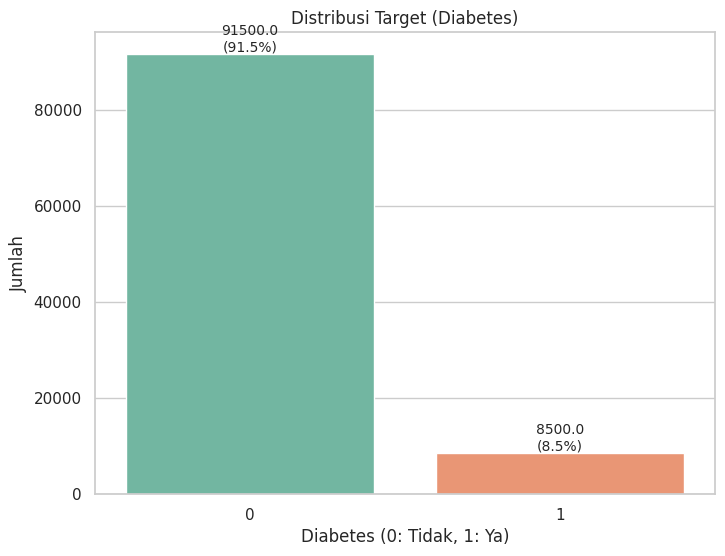

In [9]:
# Visualisasi distribusi target (diabetes)
plt.figure(figsize=(8, 6))
sns.countplot(x='diabetes', data=df, palette='Set2')
plt.title('Distribusi Target (Diabetes)')
plt.xlabel('Diabetes (0: Tidak, 1: Ya)')
plt.ylabel('Jumlah')

# Menambahkan jumlah data dan persentase ke plot
total = len(df)
for p in plt.gca().patches:
    count = p.get_height()
    percentage = round(count/total*100, 2)
    plt.gca().annotate(f'{count}\n({percentage}%)',
                      (p.get_x() + p.get_width() / 2., count),
                      ha = 'center', va = 'bottom', fontsize=10)
plt.show()

Visualisasi distribusi target menunjukkan bahwa dataset tidak seimbang, dengan jumlah data untuk kelas tidak diabetes jauh lebih banyak dibandingkan kelas diabetes.

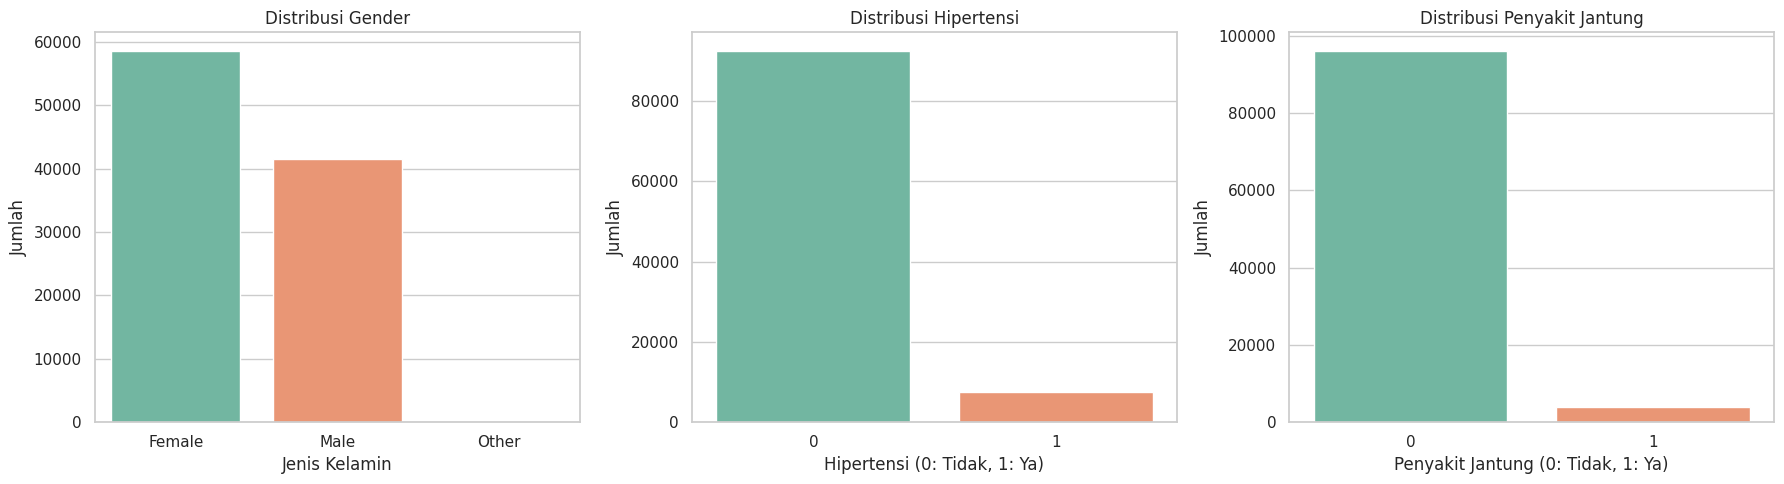

In [10]:
# Visualisasi distribusi fitur kategorikal
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gender
sns.countplot(x='gender', data=df, ax=axes[0], palette='Set2')
axes[0].set_title('Distribusi Gender')
axes[0].set_xlabel('Jenis Kelamin')
axes[0].set_ylabel('Jumlah')

# Hypertension
sns.countplot(x='hypertension', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Distribusi Hipertensi')
axes[1].set_xlabel('Hipertensi (0: Tidak, 1: Ya)')
axes[1].set_ylabel('Jumlah')

# Heart Disease
sns.countplot(x='heart_disease', data=df, ax=axes[2], palette='Set2')
axes[2].set_title('Distribusi Penyakit Jantung')
axes[2].set_xlabel('Penyakit Jantung (0: Tidak, 1: Ya)')
axes[2].set_ylabel('Jumlah')

plt.tight_layout()
plt.show()

Dari visualisasi fitur kategorikal, kita dapat melihat distribusi gender, hipertensi, dan penyakit jantung dalam dataset. Distribusi gender menunjukkan mayoritas data adalah Female, sementara mayoritas data tidak memiliki hipertensi atau penyakit jantung.

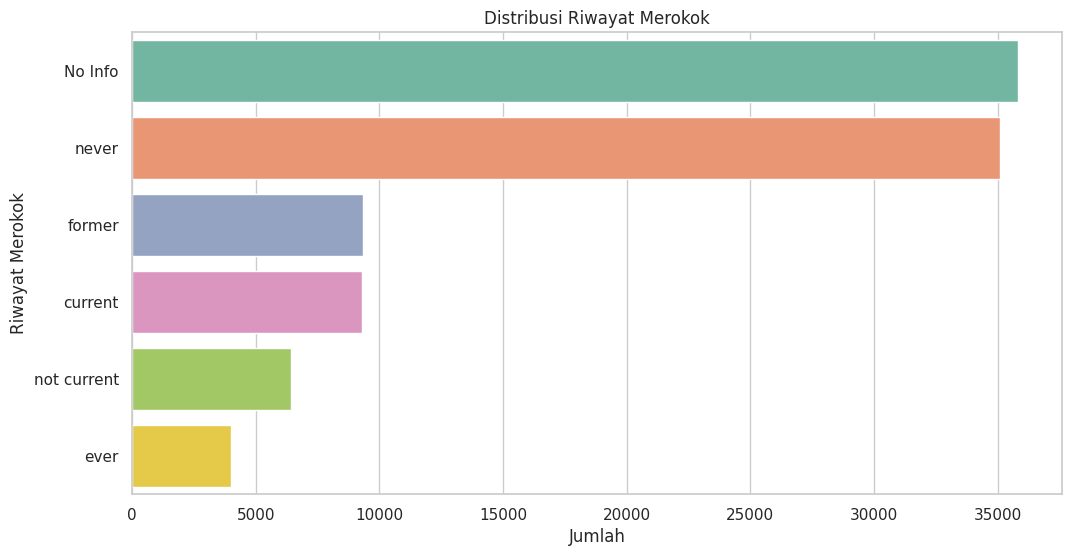

In [11]:
# Visualisasi distribusi smoking history
plt.figure(figsize=(12, 6))
sns.countplot(y='smoking_history', data=df, palette='Set2', order=df['smoking_history'].value_counts().index)
plt.title('Distribusi Riwayat Merokok')
plt.xlabel('Jumlah')
plt.ylabel('Riwayat Merokok')
plt.show()

Visualisasi riwayat merokok menunjukkan distribusi data berdasarkan kategori riwayat merokok.

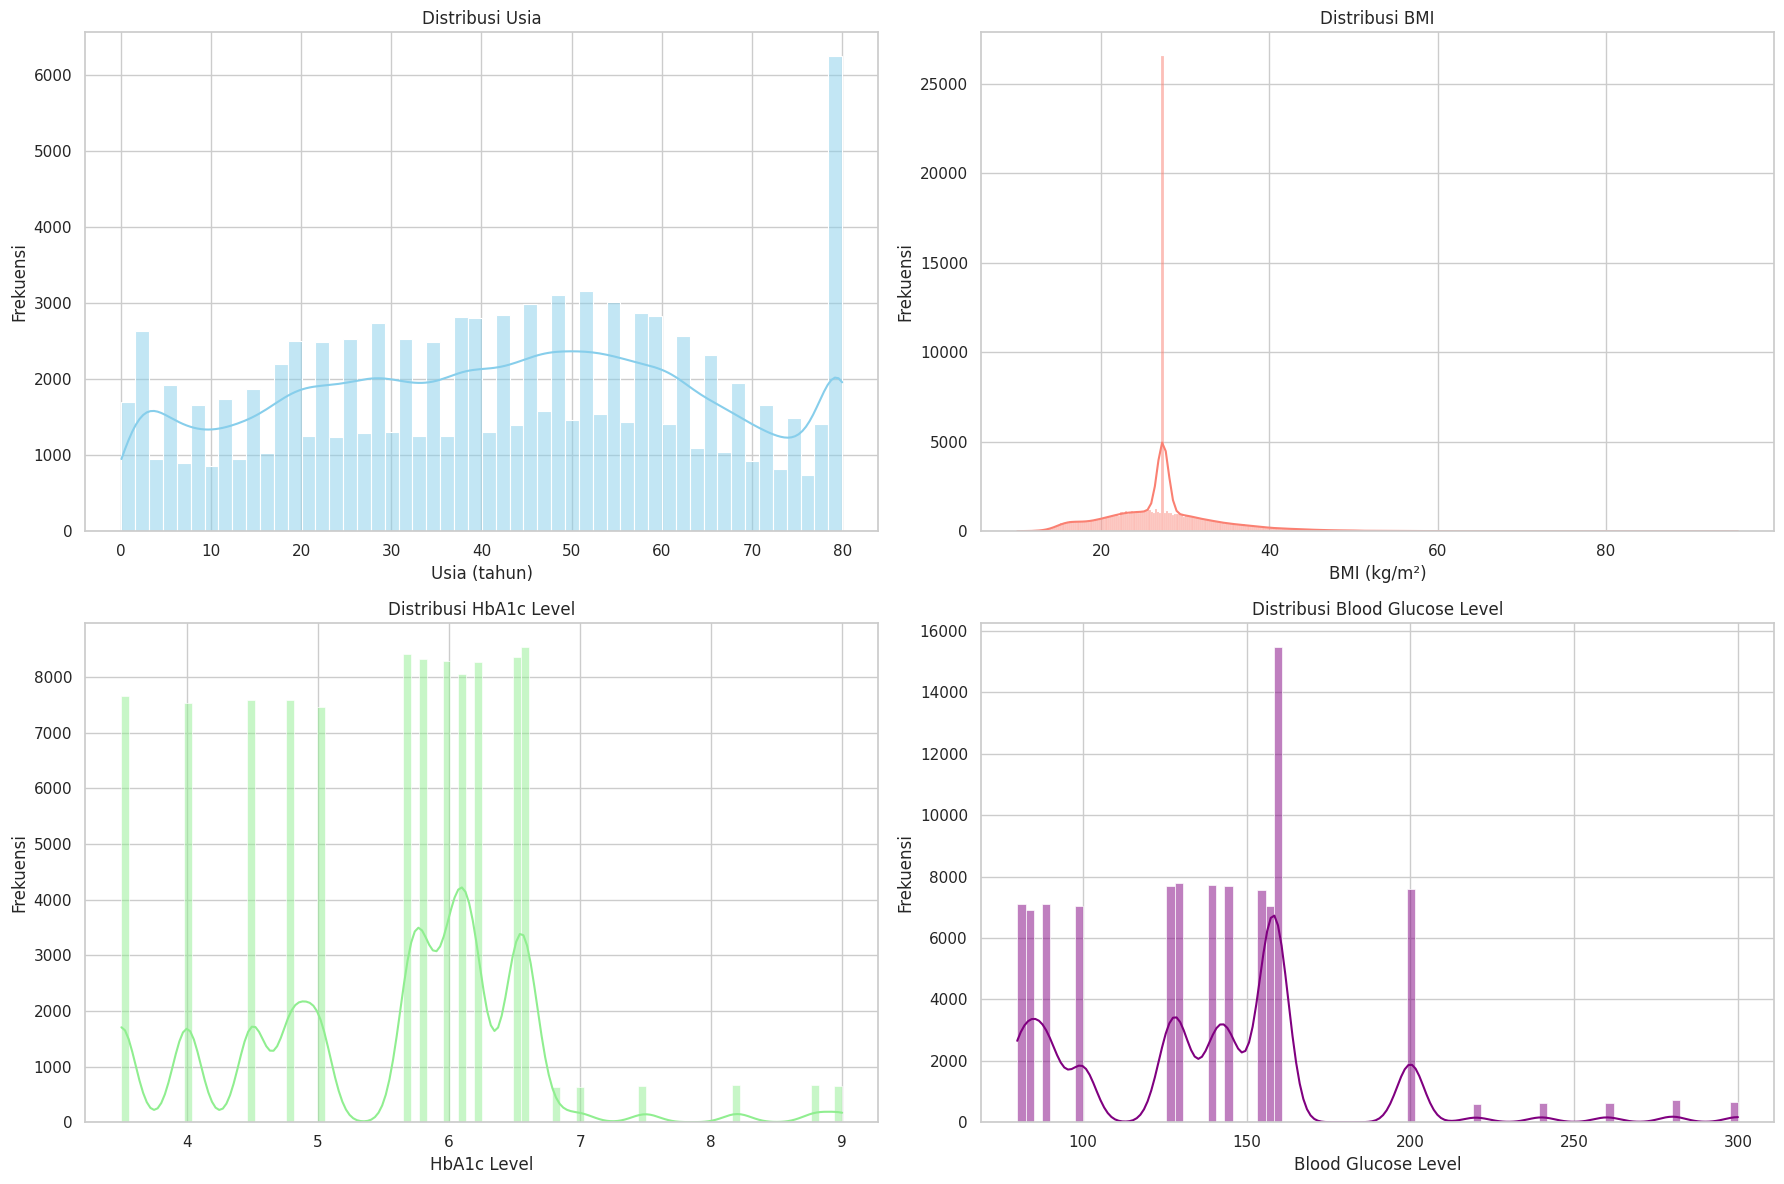

In [12]:
# Visualisasi distribusi fitur numerik
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Age
sns.histplot(data=df, x='age', kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribusi Usia')
axes[0, 0].set_xlabel('Usia (tahun)')
axes[0, 0].set_ylabel('Frekuensi')

# BMI
sns.histplot(data=df, x='bmi', kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Distribusi BMI')
axes[0, 1].set_xlabel('BMI (kg/m²)')
axes[0, 1].set_ylabel('Frekuensi')

# HbA1c Level
sns.histplot(data=df, x='HbA1c_level', kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Distribusi HbA1c Level')
axes[1, 0].set_xlabel('HbA1c Level')
axes[1, 0].set_ylabel('Frekuensi')

# Blood Glucose Level
sns.histplot(data=df, x='blood_glucose_level', kde=True, ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Distribusi Blood Glucose Level')
axes[1, 1].set_xlabel('Blood Glucose Level')
axes[1, 1].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()

Visualisasi fitur numerik menunjukkan distribusi data untuk usia, BMI, level HbA1c, dan kadar glukosa darah. Hal ini membantu kita memahami pola distribusi dan potensi outlier dalam data.

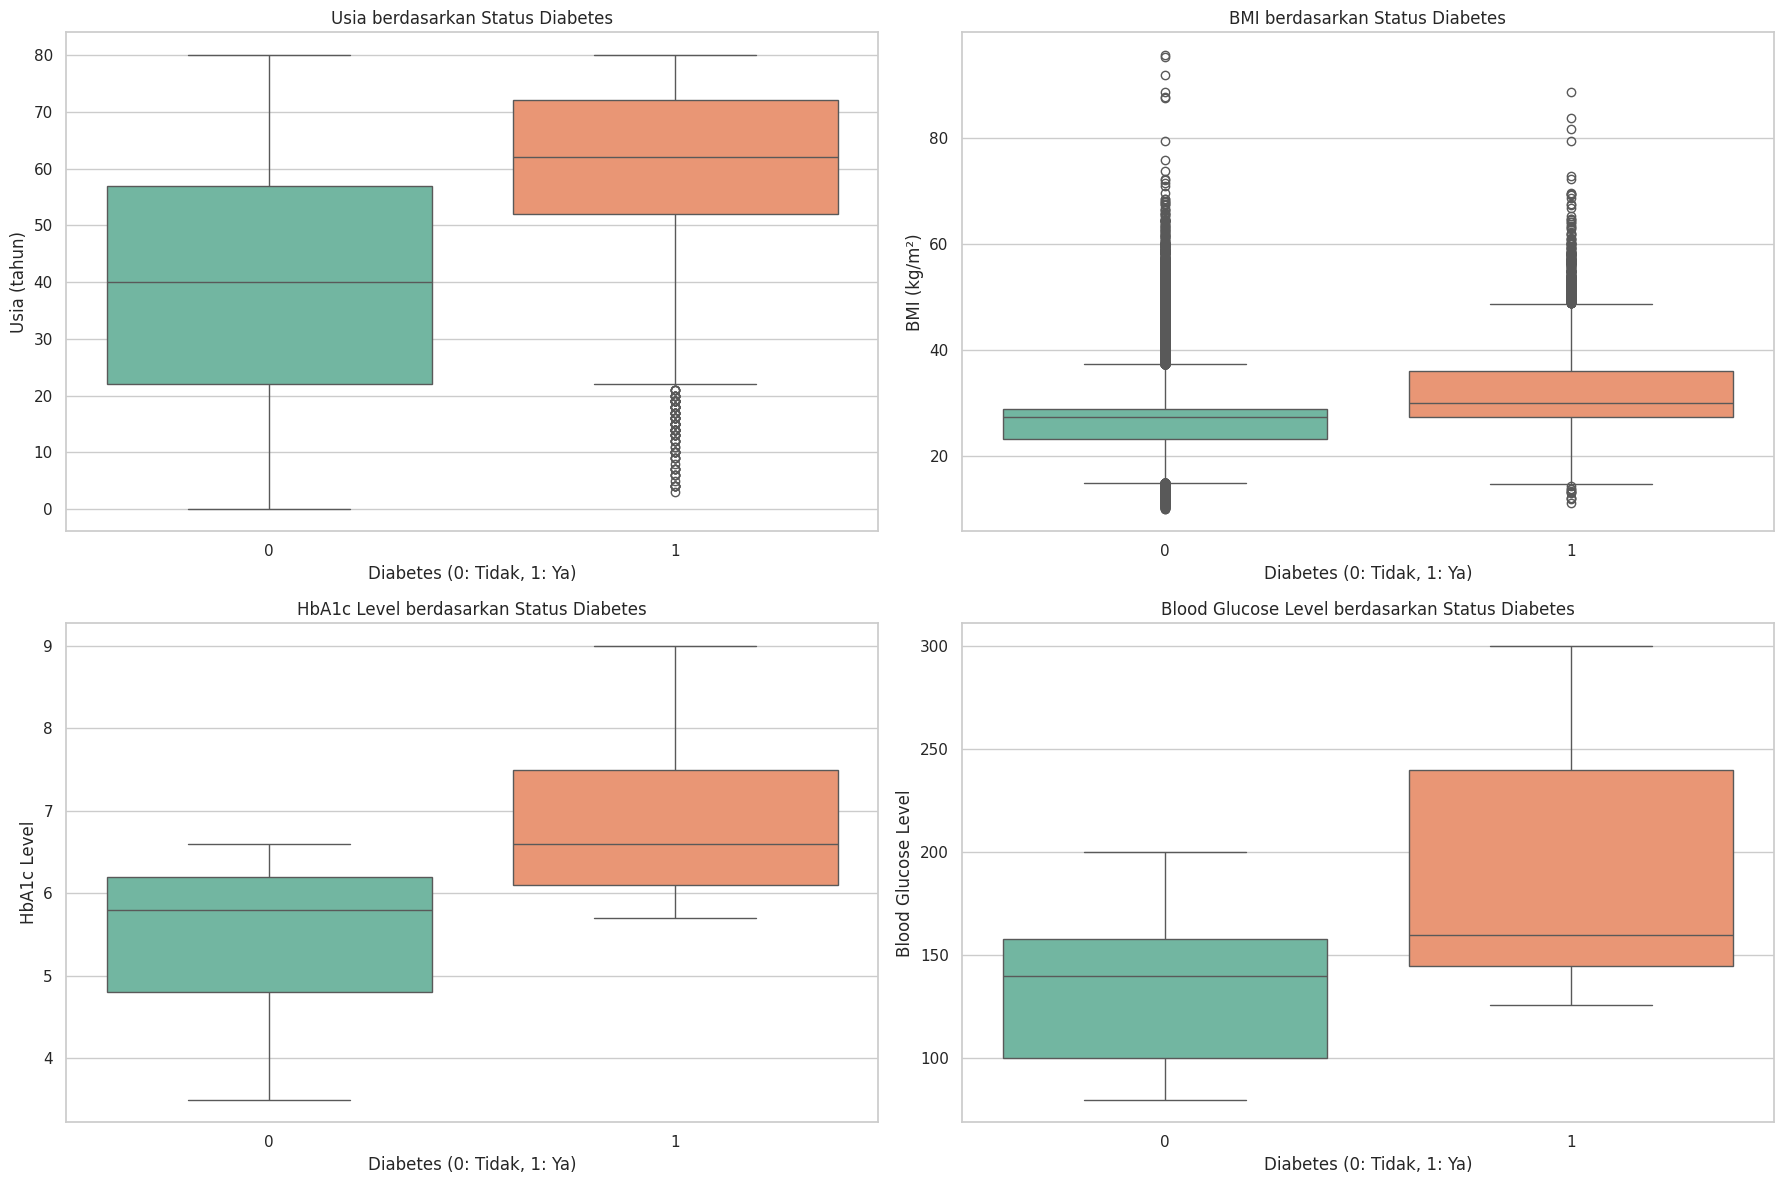

In [13]:
# Visualisasi boxplot fitur numerik berdasarkan diabetes
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Age
sns.boxplot(x='diabetes', y='age', data=df, ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Usia berdasarkan Status Diabetes')
axes[0, 0].set_xlabel('Diabetes (0: Tidak, 1: Ya)')
axes[0, 0].set_ylabel('Usia (tahun)')

# BMI
sns.boxplot(x='diabetes', y='bmi', data=df, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('BMI berdasarkan Status Diabetes')
axes[0, 1].set_xlabel('Diabetes (0: Tidak, 1: Ya)')
axes[0, 1].set_ylabel('BMI (kg/m²)')

# HbA1c Level
sns.boxplot(x='diabetes', y='HbA1c_level', data=df, ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('HbA1c Level berdasarkan Status Diabetes')
axes[1, 0].set_xlabel('Diabetes (0: Tidak, 1: Ya)')
axes[1, 0].set_ylabel('HbA1c Level')

# Blood Glucose Level
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df, ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Blood Glucose Level berdasarkan Status Diabetes')
axes[1, 1].set_xlabel('Diabetes (0: Tidak, 1: Ya)')
axes[1, 1].set_ylabel('Blood Glucose Level')

plt.tight_layout()
plt.show()

Boxplot fitur numerik berdasarkan status diabetes menunjukkan perbedaan distribusi nilai untuk setiap fitur numerik antara individu yang menderita diabetes dan yang tidak. Hal ini membantu kita melihat potensi perbedaan signifikan yang dapat menjadi prediktor diabetes.

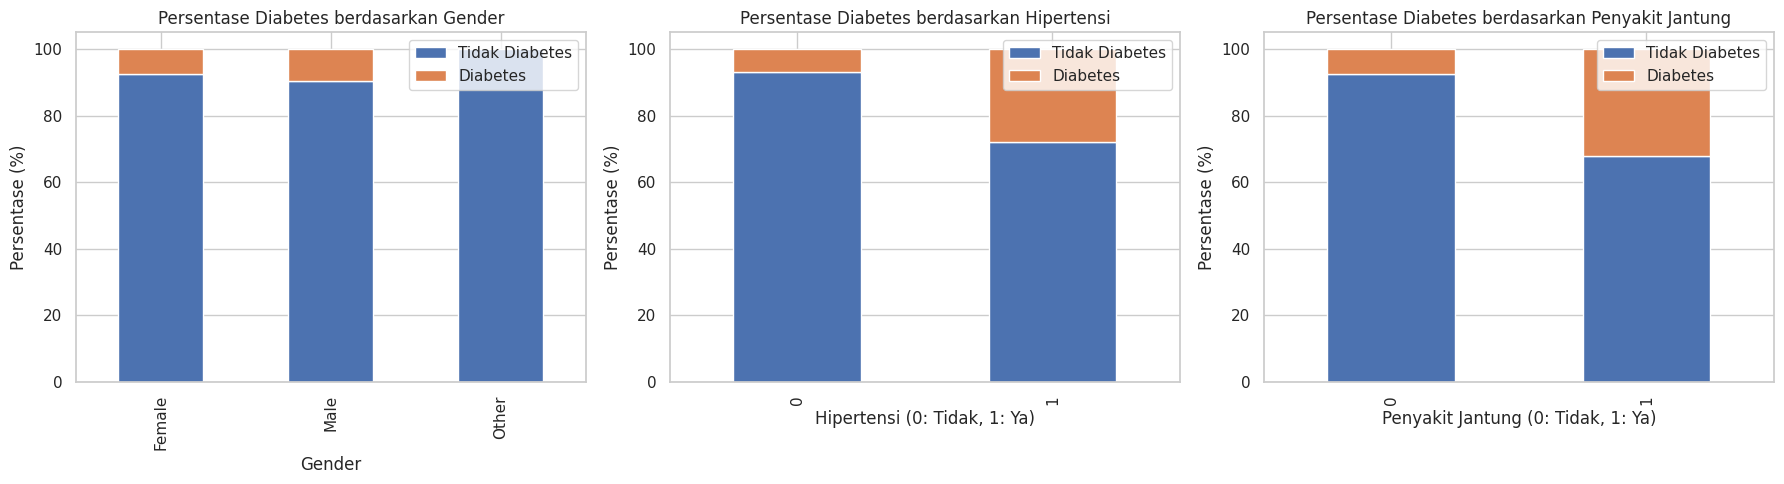

In [14]:
# Visualisasi hubungan antara fitur kategorikal dan target
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gender vs Diabetes
gender_diabetes = pd.crosstab(df['gender'], df['diabetes'])
gender_diabetes_pct = gender_diabetes.div(gender_diabetes.sum(axis=1), axis=0) * 100
gender_diabetes_pct.plot(kind='bar', ax=axes[0], stacked=True)
axes[0].set_title('Persentase Diabetes berdasarkan Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Persentase (%)')
axes[0].legend(['Tidak Diabetes', 'Diabetes'])

# Hypertension vs Diabetes
hypertension_diabetes = pd.crosstab(df['hypertension'], df['diabetes'])
hypertension_diabetes_pct = hypertension_diabetes.div(hypertension_diabetes.sum(axis=1), axis=0) * 100
hypertension_diabetes_pct.plot(kind='bar', ax=axes[1], stacked=True)
axes[1].set_title('Persentase Diabetes berdasarkan Hipertensi')
axes[1].set_xlabel('Hipertensi (0: Tidak, 1: Ya)')
axes[1].set_ylabel('Persentase (%)')
axes[1].legend(['Tidak Diabetes', 'Diabetes'])

# Heart Disease vs Diabetes
heart_diabetes = pd.crosstab(df['heart_disease'], df['diabetes'])
heart_diabetes_pct = heart_diabetes.div(heart_diabetes.sum(axis=1), axis=0) * 100
heart_diabetes_pct.plot(kind='bar', ax=axes[2], stacked=True)
axes[2].set_title('Persentase Diabetes berdasarkan Penyakit Jantung')
axes[2].set_xlabel('Penyakit Jantung (0: Tidak, 1: Ya)')
axes[2].set_ylabel('Persentase (%)')
axes[2].legend(['Tidak Diabetes', 'Diabetes'])

plt.tight_layout()
plt.show()

Visualisasi hubungan antara fitur kategorikal dan target menunjukkan persentase diabetes berdasarkan gender, status hipertensi, dan status penyakit jantung. Hal ini membantu kita memahami bagaimana fitur kategorikal tersebut berhubungan dengan kemungkinan seseorang menderita diabetes.

<Figure size 1200x600 with 0 Axes>

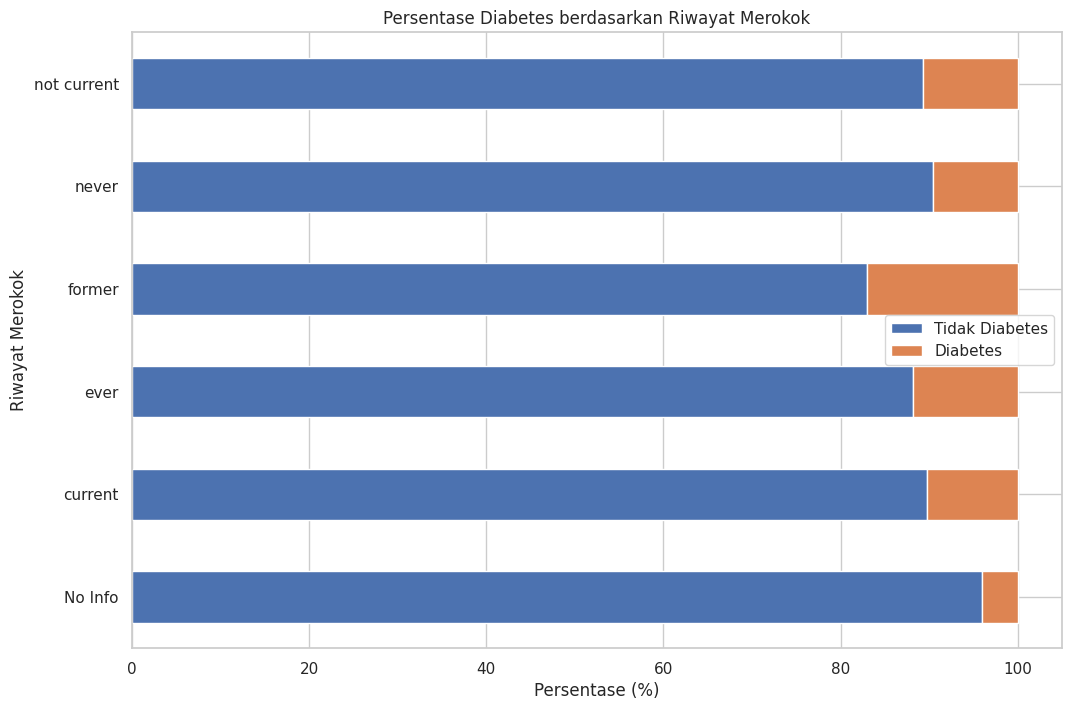

In [15]:
# Visualisasi hubungan antara smoking history dan diabetes
plt.figure(figsize=(12, 6))
smoking_diabetes = pd.crosstab(df['smoking_history'], df['diabetes'])
smoking_diabetes_pct = smoking_diabetes.div(smoking_diabetes.sum(axis=1), axis=0) * 100
smoking_diabetes_pct.plot(kind='barh', stacked=True)
plt.title('Persentase Diabetes berdasarkan Riwayat Merokok')
plt.xlabel('Persentase (%)')
plt.ylabel('Riwayat Merokok')
plt.legend(['Tidak Diabetes', 'Diabetes'])
plt.show()

Visualisasi hubungan antara riwayat merokok dan diabetes menunjukkan persentase diabetes berdasarkan riwayat merokok. Hal ini membantu kita memahami bagaimana riwayat merokok berhubungan dengan kemungkinan seseorang menderita diabetes.

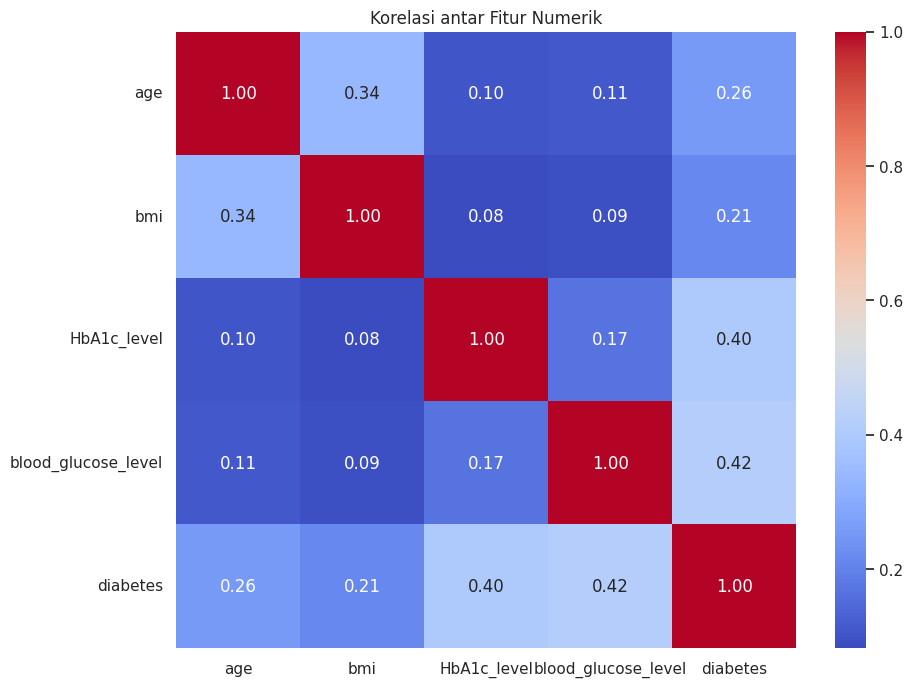

In [16]:
# Membuat heatmap korelasi untuk fitur numerik
numeric_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
correlation = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antar Fitur Numerik')
plt.show()

Heatmap korelasi menunjukkan tingkat korelasi antar fitur numerik dalam dataset. Warna merah menunjukkan korelasi yang lebih kuat, sedangkan warna biru menunjukkan korelasi yang lebih lemah.

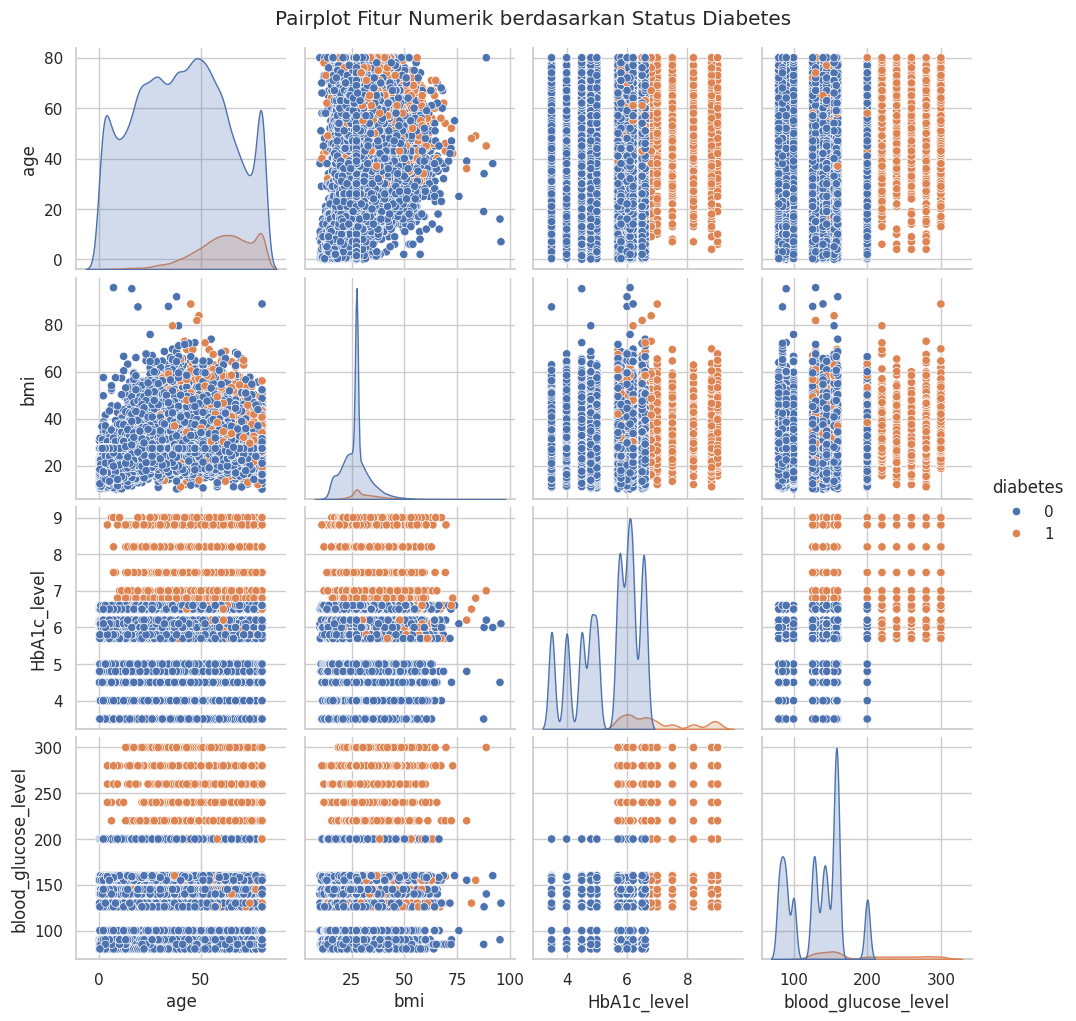

In [17]:
# Membuat pairplot untuk melihat hubungan antar fitur numerik
sns.pairplot(df[numeric_columns], hue='diabetes')
plt.suptitle('Pairplot Fitur Numerik berdasarkan Status Diabetes', y=1.02)
plt.show()

Pairplot menunjukkan hubungan antar fitur numerik berdasarkan status diabetes. Hal ini membantu kita melihat bagaimana fitur-fitur tersebut saling berkaitan dan bagaimana pola distribusi data berdasarkan status diabetes.

# **4. Eksplorasi Data dan Pra-pemrosesan**

## **4.1. Menangani Missing Values**

Pada tahap ini, kita memeriksa kembali jumlah nilai yang hilang dalam dataset untuk memastikan bahwa tidak ada data yang hilang sebelum melakukan pra-pemrosesan lebih lanjut.

In [18]:
# Memeriksa kembali jumlah missing values
print("Jumlah Missing Values:")
display(df.isnull().sum())

Jumlah Missing Values:


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Tidak ada nilai yang hilang dalam dataset, sehingga kita dapat melanjutkan ke tahap berikutnya.

## **4.2. Menangani Nilai Duplikat**

Pada tahap ini, kita menghapus nilai duplikat dalam dataset untuk menghindari bias dalam analisis dan pembuatan model.

In [19]:
# Menghapus nilai duplikat jika ada
df_cleaned = df.drop_duplicates()
print(f"Jumlah data sebelum menghapus duplikat: {df.shape[0]}")
print(f"Jumlah data setelah menghapus duplikat: {df_cleaned.shape[0]}")
print(f"Jumlah duplikat yang dihapus: {df.shape[0] - df_cleaned.shape[0]}")

# Menggunakan dataset yang sudah dibersihkan
df = df_cleaned

Jumlah data sebelum menghapus duplikat: 100000
Jumlah data setelah menghapus duplikat: 96146
Jumlah duplikat yang dihapus: 3854


Sebanyak 3.854 data duplikat telah dihapus dari dataset, menyisakan 96.146 data unik.

## **4.3. Mendeteksi Outlier**

Pada tahap ini, kita mendeteksi outlier dalam fitur numerik menggunakan metode visualisasi dan metode IQR (Interquartile Range).

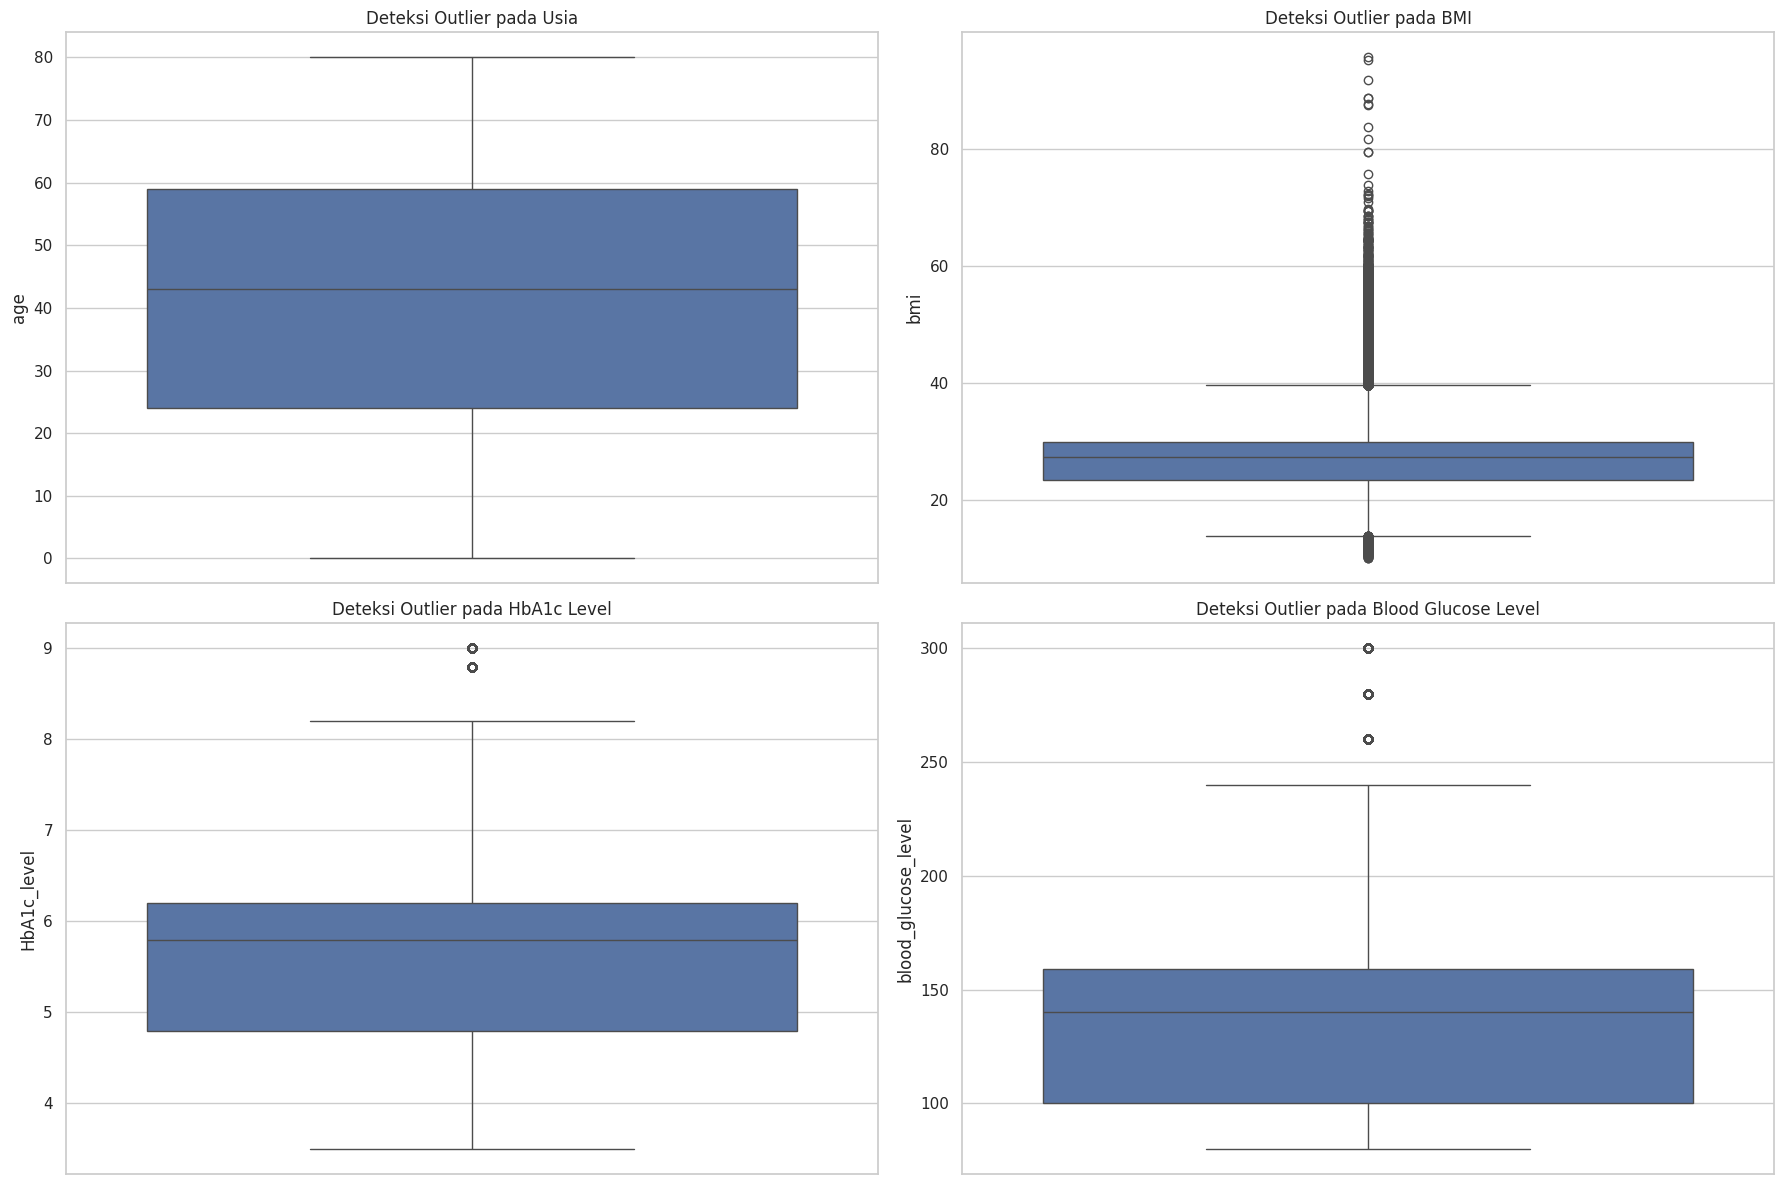

In [20]:
# Visualisasi outlier dengan boxplot untuk fitur numerik
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Age
sns.boxplot(y='age', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Deteksi Outlier pada Usia')

# BMI
sns.boxplot(y='bmi', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Deteksi Outlier pada BMI')

# HbA1c Level
sns.boxplot(y='HbA1c_level', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Deteksi Outlier pada HbA1c Level')

# Blood Glucose Level
sns.boxplot(y='blood_glucose_level', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Deteksi Outlier pada Blood Glucose Level')

plt.tight_layout()
plt.show()

Visualisasi boxplot membantu kita melihat outlier dalam fitur numerik. Outlier ditampilkan sebagai titik di luar whisker boxplot.

In [21]:
# Menghitung IQR dan batas untuk outlier
def detect_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

    print(f"Kolom: {column}")
    print(f"Jumlah outlier: {len(outliers)}")
    print(f"Persentase outlier: {(len(outliers) / len(df)) * 100:.2f}%")
    print(f"Batas bawah: {lower_bound}")
    print(f"Batas atas: {upper_bound}")
    print("-" * 50)

    return outliers

# Mendeteksi outlier untuk fitur numerik
numeric_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

for feature in numeric_features:
    outliers = detect_outliers(df, feature)

Kolom: age
Jumlah outlier: 0
Persentase outlier: 0.00%
Batas bawah: -28.5
Batas atas: 111.5
--------------------------------------------------
Kolom: bmi
Jumlah outlier: 5354
Persentase outlier: 5.57%
Batas bawah: 13.709999999999997
Batas atas: 39.55
--------------------------------------------------
Kolom: HbA1c_level
Jumlah outlier: 1312
Persentase outlier: 1.36%
Batas bawah: 2.6999999999999993
Batas atas: 8.3
--------------------------------------------------
Kolom: blood_glucose_level
Jumlah outlier: 2031
Persentase outlier: 2.11%
Batas bawah: 11.5
Batas atas: 247.5
--------------------------------------------------


Dari hasil di atas, kita dapat melihat bahwa beberapa fitur numerik memiliki outlier yang perlu ditangani.

## **4.4. Menangani Outlier**

Pada tahap ini, kita menangani outlier menggunakan metode capping, yaitu membatasi nilai outlier ke batas atas atau batas bawah yang telah ditentukan.

In [22]:
# Menangani outlier dengan metode capping
def handle_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    # Menghitung jumlah data sebelum capping
    outliers_count = len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])

    # Melakukan capping
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return outliers_count

# Melakukan capping untuk semua fitur numerik
total_outliers = 0
for feature in numeric_features:
    outliers_count = handle_outliers(df, feature)
    total_outliers += outliers_count
    print(f"Outlier yang ditangani pada {feature}: {outliers_count}")

print(f"Total outlier yang ditangani: {total_outliers}")

Outlier yang ditangani pada age: 0
Outlier yang ditangani pada bmi: 5354
Outlier yang ditangani pada HbA1c_level: 1312
Outlier yang ditangani pada blood_glucose_level: 2031
Total outlier yang ditangani: 8697


Sebanyak 8.697 outlier telah ditangani menggunakan metode capping.

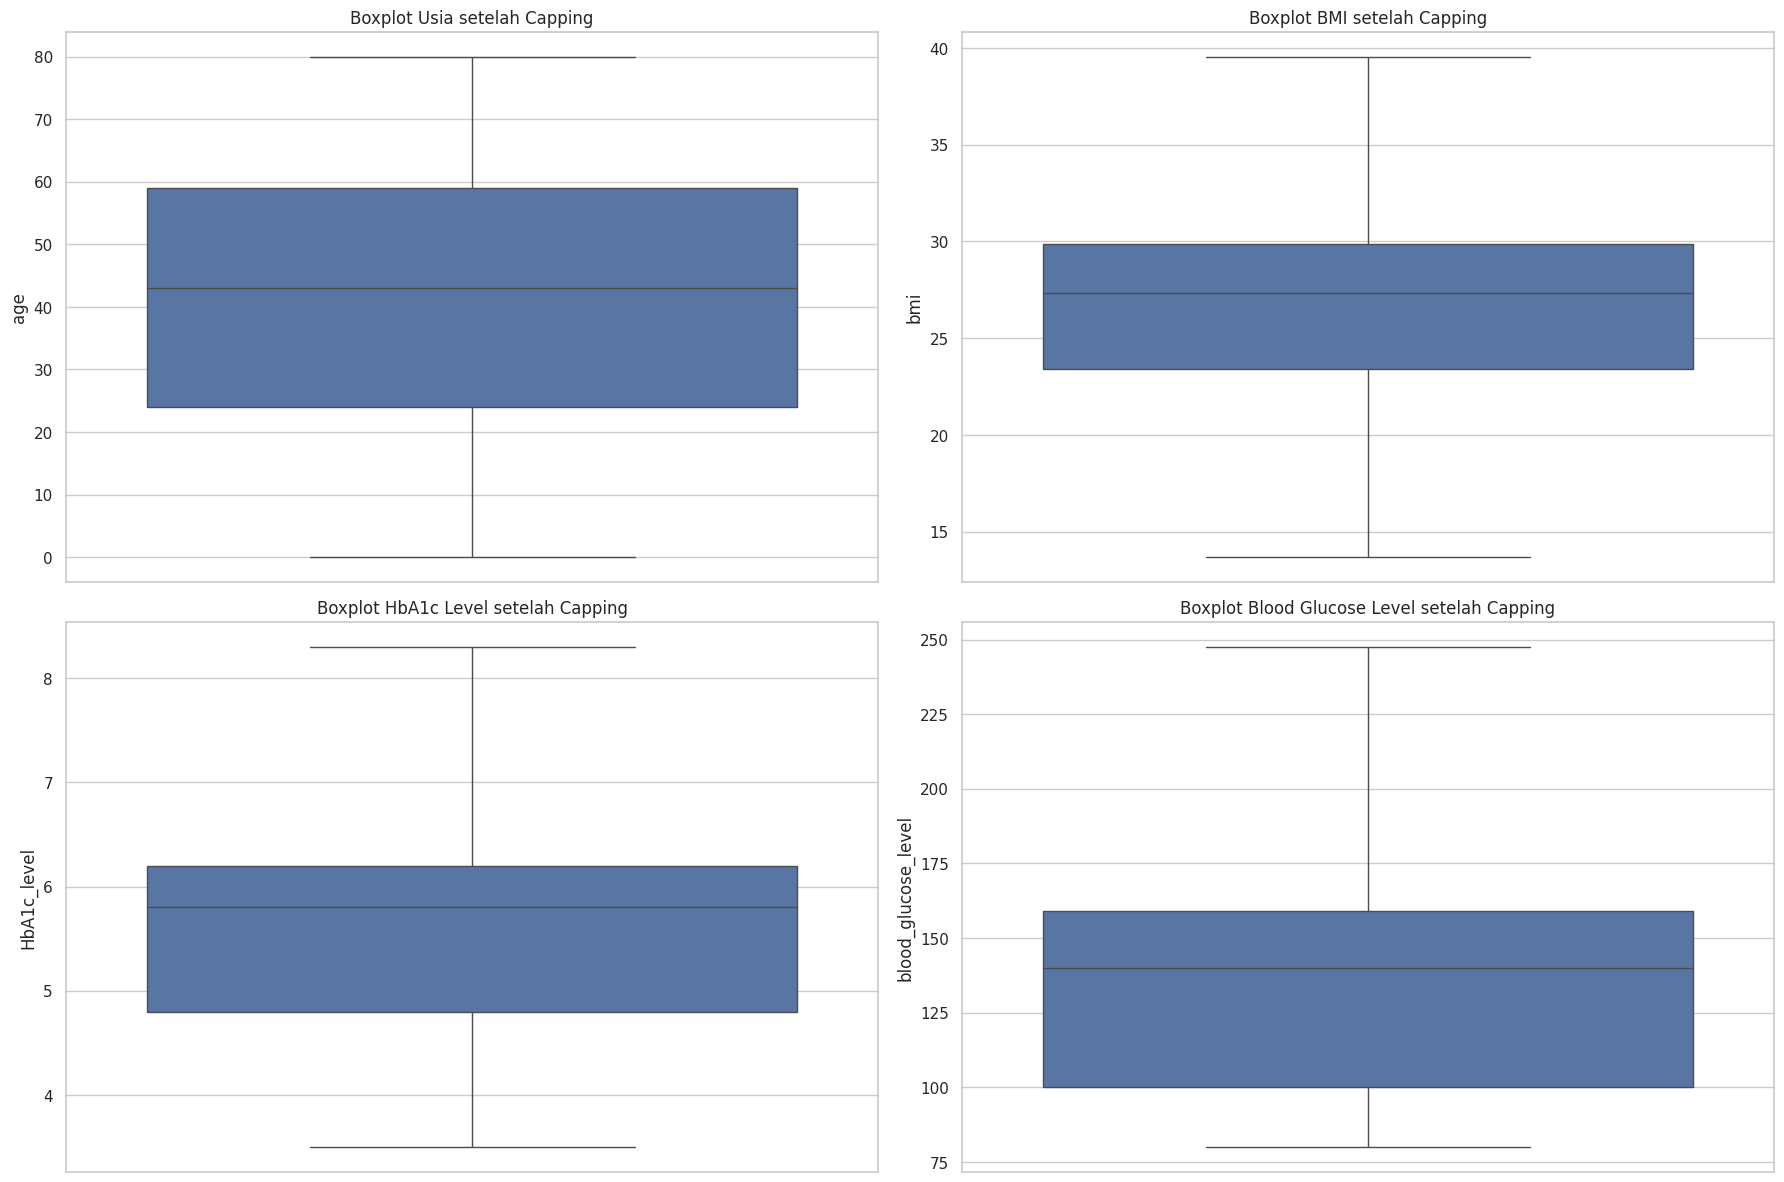

In [23]:
# Verifikasi hasil capping dengan boxplot
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Age
sns.boxplot(y='age', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot Usia setelah Capping')

# BMI
sns.boxplot(y='bmi', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot BMI setelah Capping')

# HbA1c Level
sns.boxplot(y='HbA1c_level', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot HbA1c Level setelah Capping')

# Blood Glucose Level
sns.boxplot(y='blood_glucose_level', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Boxplot Blood Glucose Level setelah Capping')

plt.tight_layout()
plt.show()

Visualisasi boxplot setelah capping menunjukkan bahwa outlier telah ditangani dengan baik.

## **4.5. Mengecek Nilai yang Tidak Valid**

Pada tahap ini, kita memeriksa nilai yang tidak valid dalam dataset, seperti BMI negatif atau nol, HbA1c level yang tidak masuk akal, dan sebagainya.

In [24]:
# Memeriksa nilai yang tidak valid

# BMI tidak bisa negatif atau nol
invalid_bmi = df[df['bmi'] <= 0]
print(f"Jumlah data dengan BMI tidak valid (≤ 0): {len(invalid_bmi)}")

# HbA1c level biasanya antara 3 dan 15
invalid_hba1c = df[(df['HbA1c_level'] < 3) | (df['HbA1c_level'] > 15)]
print(f"Jumlah data dengan HbA1c level tidak valid (< 4 atau > 15): {len(invalid_hba1c)}")

# Blood glucose level biasanya tidak negatif dan tidak terlalu rendah
invalid_glucose = df[df['blood_glucose_level'] <= 50]
print(f"Jumlah data dengan blood glucose level tidak valid (≤ 50): {len(invalid_glucose)}")

# Age tidak bisa negatif atau terlalu tinggi
invalid_age = df[(df['age'] < 0) | (df['age'] > 120)]
print(f"Jumlah data dengan age tidak valid (< 0 atau > 120): {len(invalid_age)}")

Jumlah data dengan BMI tidak valid (≤ 0): 0
Jumlah data dengan HbA1c level tidak valid (< 4 atau > 15): 0
Jumlah data dengan blood glucose level tidak valid (≤ 50): 0
Jumlah data dengan age tidak valid (< 0 atau > 120): 0


Tidak ada nilai yang tidak valid dalam dataset, sehingga kita dapat melanjutkan ke tahap berikutnya.

## **4.6. Encoding Fitur Kategorikal**

Pada tahap ini, kita melakukan encoding fitur kategorikal menjadi bentuk numerik agar dapat digunakan dalam model machine learning.

In [25]:
# Melihat nilai unik pada fitur kategorikal
print("Nilai unik pada gender:")
display(df['gender'].value_counts())

print("\nNilai unik pada smoking_history:")
display(df['smoking_history'].value_counts())

Nilai unik pada gender:


gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64


Nilai unik pada smoking_history:


smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64

Kita dapat melihat nilai unik untuk fitur kategorikal gender dan smoking_history.

In [26]:
# One-Hot Encoding untuk fitur kategorikal
df_encoded = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)

# Menampilkan hasil encoding
print("Hasil Encoding:")
display(df_encoded.head())
print(f"Jumlah kolom setelah encoding: {df_encoded.shape[1]}")

Hasil Encoding:


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140.0,0,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80.0,0,False,False,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158.0,0,True,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155.0,0,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155.0,0,True,False,True,False,False,False,False


Jumlah kolom setelah encoding: 14


One-Hot Encoding mengubah fitur kategorikal menjadi kolom-kolom biner. `drop_first=True` menghapus kolom pertama untuk menghindari multikolinearitas. Setelah encoding, jumlah kolom dalam dataset meningkat karena setiap kategori dalam fitur kategorikal diubah menjadi kolom terpisah.

## **4.7. Normalisasi atau Standarisasi Data**

Normalisasi atau standarisasi data penting untuk memastikan bahwa fitur-fitur numerik memiliki skala yang sama, sehingga tidak ada fitur yang mendominasi dalam model machine learning.

In [27]:
# Memisahkan fitur dan target
X = df_encoded.drop('diabetes', axis=1)
y = df_encoded['diabetes']

# Memisahkan fitur numerik dan kategorikal
numeric_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
categorical_features = [col for col in X.columns if col not in numeric_features]

# Standardisasi fitur numerik
scaler = MinMaxScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# Menampilkan hasil standardisasi
print("Hasil Standardisasi:")
display(X.head())

Hasil Standardisasi:


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.000000,0,1,0.444272,0.645833,0.358209,False,False,False,False,False,True,False
1,0.674675,0,0,0.526703,0.645833,0.000000,False,False,False,False,False,False,False
2,0.349349,0,0,0.526703,0.458333,0.465672,True,False,False,False,False,True,False
3,0.449449,0,0,0.376935,0.312500,0.447761,False,False,True,False,False,False,False
4,0.949950,1,1,0.248839,0.270833,0.447761,True,False,True,False,False,False,False


Kita menggunakan MinMaxScaler untuk menskala fitur numerik ke rentang 0-1. Hal ini membantu model machine learning konvergen lebih cepat dan memberikan bobot yang seimbang antar fitur.

## **4.8. Analisis Korelasi antara Variabel Independen dan Dependen**

Pada tahap ini, kita menganalisis korelasi antara variabel independen dan variabel dependen untuk memahami hubungan antar variabel dan menentukan fitur-fitur yang paling berpengaruh terhadap target.

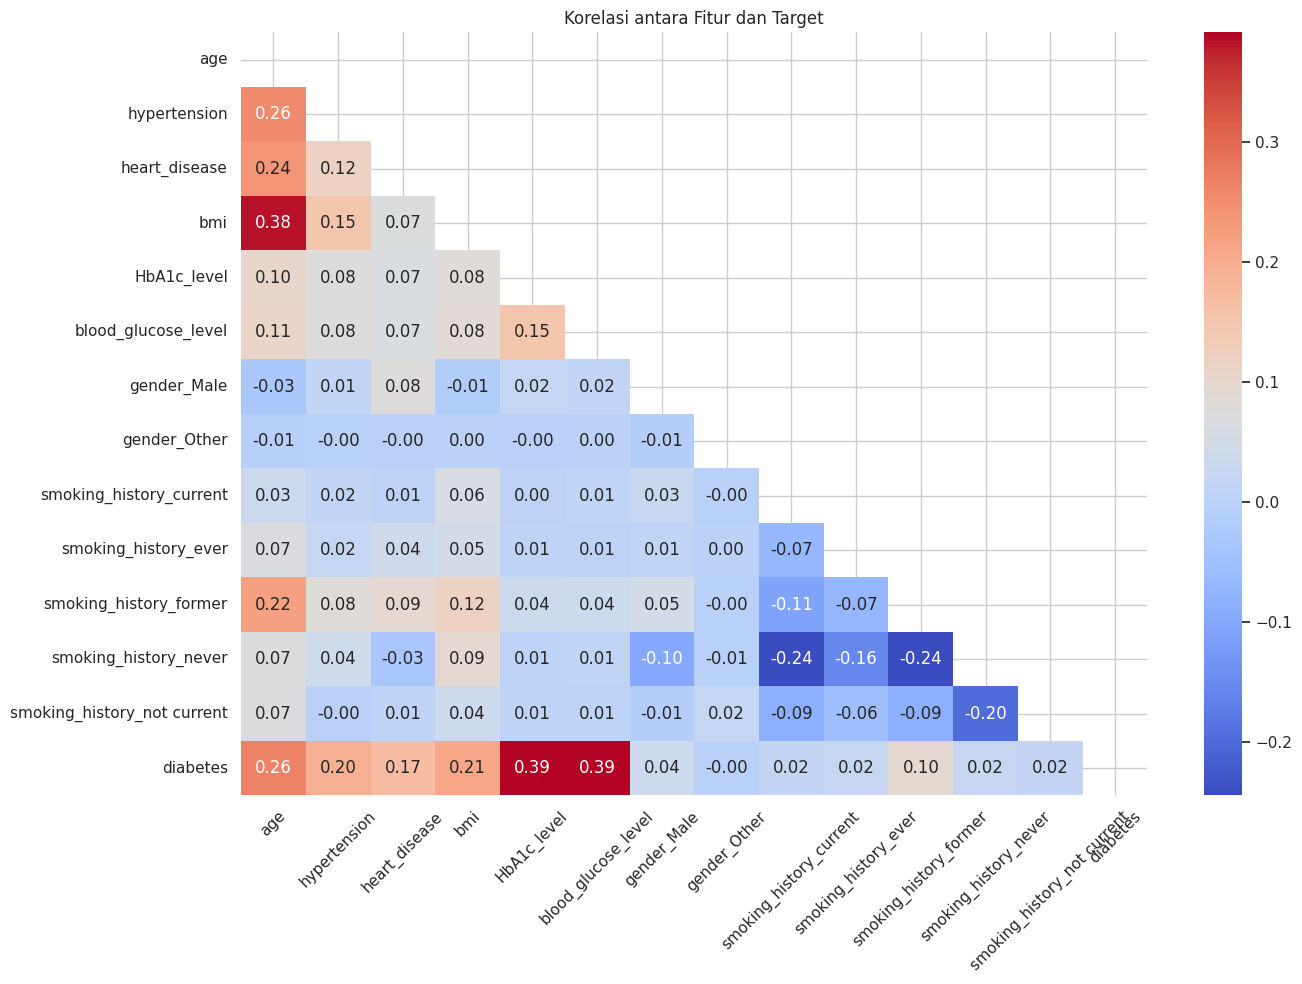

In [28]:
# Menambahkan target kembali ke dataframe untuk analisis korelasi
X_corr = X.copy()
X_corr['diabetes'] = y

# Membuat heatmap korelasi
plt.figure(figsize=(14, 10))
correlation = X_corr.corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Korelasi antara Fitur dan Target')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Heatmap korelasi menunjukkan korelasi antar fitur dan target. Nilai korelasi berkisar antara -1 hingga 1, di mana nilai 1 menunjukkan korelasi positif sempurna, nilai -1 menunjukkan korelasi negatif sempurna, dan nilai 0 menunjukkan tidak ada korelasi.

## **4.9. Menangani Ketidakseimbangan Kelas**

Pada tahap ini, kita menangani ketidakseimbangan kelas dalam dataset menggunakan teknik SMOTE (Synthetic Minority Over-sampling Technique).

In [29]:
# Memeriksa distribusi kelas sebelum balancing
print("Distribusi kelas sebelum balancing:")
print(Counter(y))

# Menerapkan SMOTE untuk oversampling kelas minoritas
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Memeriksa distribusi kelas setelah balancing
print("\nDistribusi kelas setelah balancing dengan SMOTE:")
print(Counter(y_balanced))

Distribusi kelas sebelum balancing:
Counter({0: 87664, 1: 8482})

Distribusi kelas setelah balancing dengan SMOTE:
Counter({0: 87664, 1: 87664})


SMOTE digunakan untuk menyeimbangkan kelas dalam dataset. Sebelum balancing, kelas 0 (tidak diabetes) memiliki 87.664 data, sedangkan kelas 1 (diabetes) hanya memiliki 8.482 data. Setelah balancing dengan SMOTE, kedua kelas memiliki jumlah data yang sama, yaitu 87.664 data.

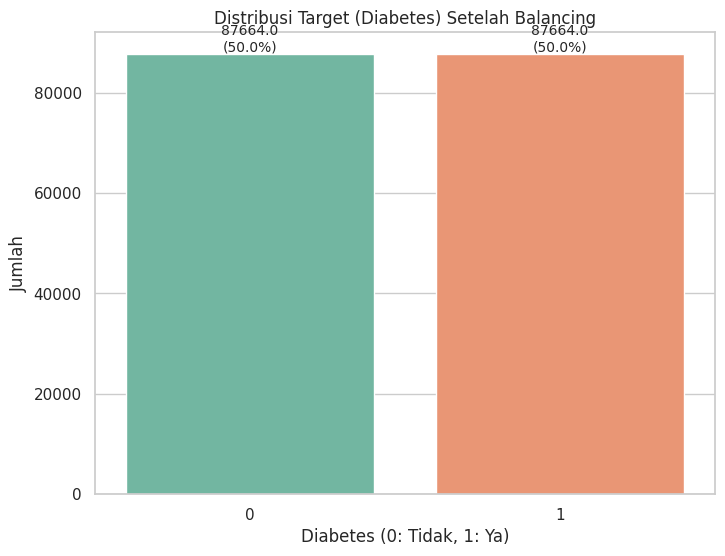

In [30]:
# Visualisasi distribusi kelas setelah balancing
plt.figure(figsize=(8, 6))
sns.countplot(x=y_balanced, palette='Set2')
plt.title('Distribusi Target (Diabetes) Setelah Balancing')
plt.xlabel('Diabetes (0: Tidak, 1: Ya)')
plt.ylabel('Jumlah')

# Menambahkan jumlah data dan persentase ke plot
total_balanced = len(y_balanced)
for p in plt.gca().patches:
    count = p.get_height()
    percentage = round(count/total_balanced*100, 2)
    plt.gca().annotate(f'{count}\n({percentage}%)',
                      (p.get_x() + p.get_width() / 2., count),
                      ha='center', va='bottom', fontsize=10)
plt.show()

Visualisasi distribusi kelas setelah balancing menunjukkan bahwa kedua kelas sekarang memiliki jumlah data yang sama.

Korelasi fitur dengan target (diabetes):


diabetes                       1.000000
blood_glucose_level            0.391470
HbA1c_level                    0.390543
age                            0.264927
bmi                            0.212017
hypertension                   0.195710
heart_disease                  0.170711
smoking_history_former         0.095492
gender_Male                    0.037883
smoking_history_never          0.023136
smoking_history_ever           0.021915
smoking_history_not current    0.018921
smoking_history_current        0.017037
gender_Other                  -0.004256
Name: diabetes, dtype: float64

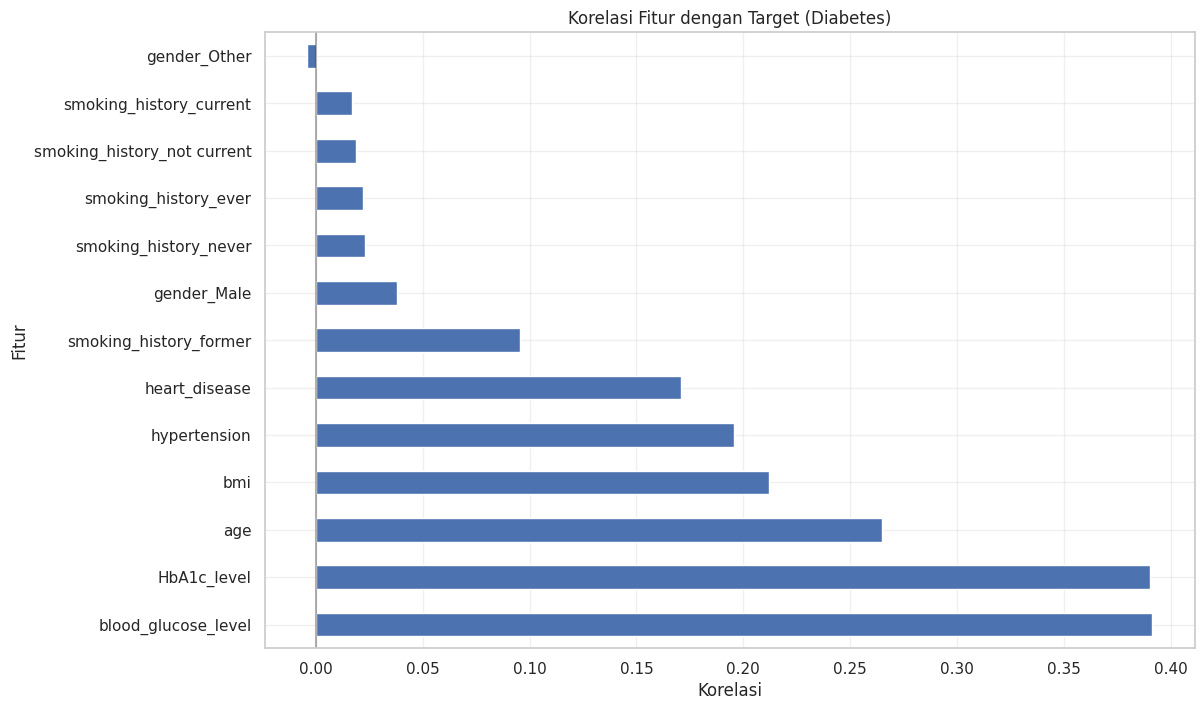

In [31]:
# Menampilkan korelasi variabel dengan target (diabetes)
target_correlation = correlation['diabetes'].sort_values(ascending=False)
print("Korelasi fitur dengan target (diabetes):")
display(target_correlation)

# Visualisasi korelasi dengan target
plt.figure(figsize=(12, 8))
target_correlation.drop('diabetes').plot(kind='barh')
plt.title('Korelasi Fitur dengan Target (Diabetes)')
plt.xlabel('Korelasi')
plt.ylabel('Fitur')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.show()

Visualisasi korelasi variabel dengan target menunjukkan fitur-fitur yang memiliki korelasi tertinggi dengan diabetes. Fitur dengan korelasi positif tinggi menunjukkan bahwa peningkatan nilai fitur tersebut cenderung meningkatkan kemungkinan diabetes, sedangkan fitur dengan korelasi negatif tinggi menunjukkan sebaliknya.

# **5. Implementasi Model**

## **5.1. Train-Test Split**

Pada tahap ini, kita membagi dataset menjadi data latih dan data uji dengan perbandingan 80:20.

In [32]:
# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")

# Memeriksa distribusi target pada data latih dan uji
print("\nDistribusi Target pada Data Latih:")
display(pd.Series(y_train).value_counts(normalize=True))

print("\nDistribusi Target pada Data Uji:")
display(pd.Series(y_test).value_counts(normalize=True))

Jumlah data latih: 76916
Jumlah data uji: 19230

Distribusi Target pada Data Latih:


diabetes
0    0.911774
1    0.088226
Name: proportion, dtype: float64


Distribusi Target pada Data Uji:


diabetes
0    0.911804
1    0.088196
Name: proportion, dtype: float64

Data dibagi menjadi 76.916 data latih dan 19.230 data uji. Parameter `stratify=y` memastikan bahwa distribusi kelas dalam data latih dan data uji sama dengan distribusi kelas dalam dataset asli.

## **5.2. Membangun Model Logistic Regression**

Pada tahap ini, kita membangun model Logistic Regression untuk memprediksi diabetes.

Evaluasi Model Logistic Regression:
Accuracy: 0.9581
Precision: 0.8584
Recall: 0.6291
F1 Score: 0.7261


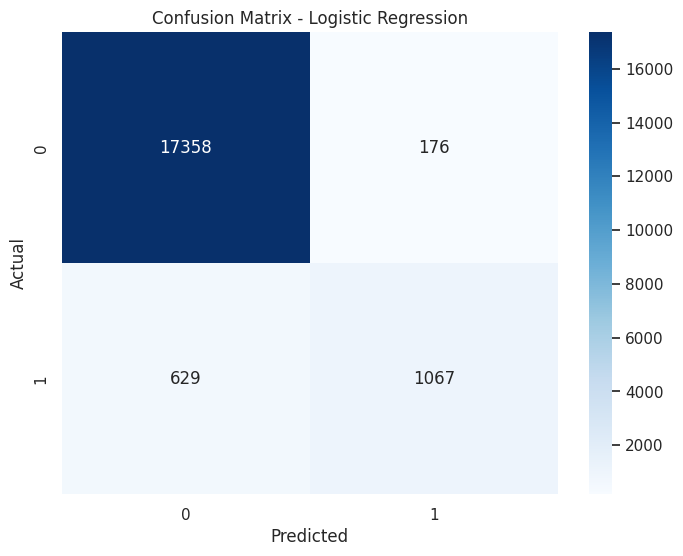

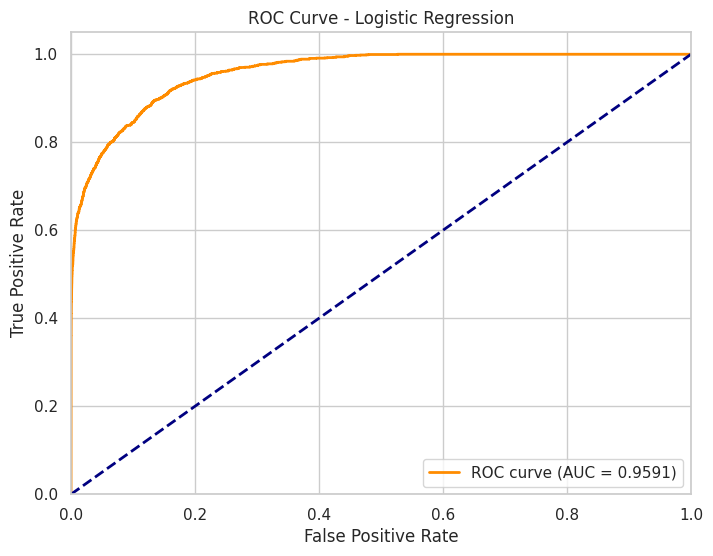

In [33]:
# Membangun model Logistic Regression
logistic_regression = LogisticRegression(random_state=42, max_iter=1000)
logistic_regression.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_lr = logistic_regression.predict(X_test)
y_prob_lr = logistic_regression.predict_proba(X_test)[:, 1]

# Evaluasi model
print("Evaluasi Model Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr):.4f}")

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_lr:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

Model Logistic Regression mencapai akurasi 95.81%, precision 85.84%, recall 62.91%, dan F1 score 72.61%. Confusion matrix dan ROC curve juga ditampilkan untuk evaluasi model yang lebih mendalam.

## **5.3. Membangun Model K-Nearest Neighbor**

Evaluasi Model K-Nearest Neighbor:
Accuracy: 0.9594
Precision: 0.8861
Recall: 0.6191
F1 Score: 0.7289


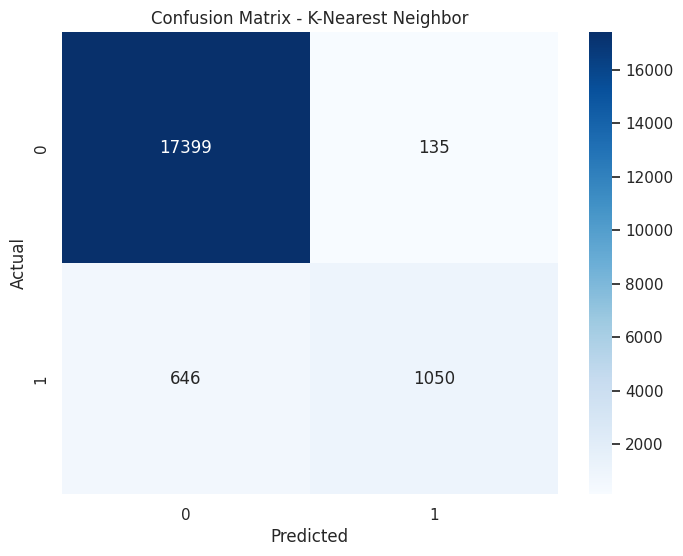

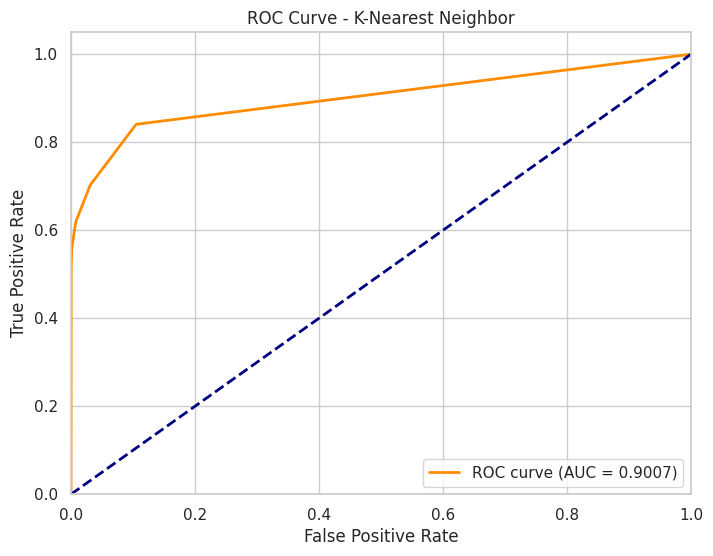

In [34]:
# Membangun model K-Nearest Neighbor
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:, 1]

# Evaluasi model
print("Evaluasi Model K-Nearest Neighbor:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn):.4f}")

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - K-Nearest Neighbor')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_knn:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - K-Nearest Neighbor')
plt.legend(loc="lower right")
plt.show()

Model K-Nearest Neighbor mencapai akurasi 95.94%, precision 88.61%, recall 61.91%, dan F1 score 72.89%. Confusion matrix dan ROC curve juga ditampilkan untuk evaluasi model yang lebih mendalam.

## **5.4. Membangun Model Naïve Bayes**

Pada tahap ini, kita membangun model Naïve Bayes dengan optimasi lanjutan untuk memprediksi diabetes.

Fitur terpilih: ['age', 'hypertension', 'heart_disease', 'HbA1c_level', 'blood_glucose_level', 'smoking_history_No Info', 'HbA1c_bin_normal', 'HbA1c_bin_diabetes', 'glucose_bin_normal', 'glucose_bin_diabetes', 'bmi_bin_obese', 'age_bin_youth', 'age_bin_young_adult', 'age_bin_senior', 'age_bin_elderly']
Jumlah fitur setelah seleksi: 15
Menerapkan metode resampling kombinasi SMOTE dan Tomek links...
Distribusi kelas setelah resampling: Counter({0: 69708, 1: 34643})
Mencari model Naive Bayes optimal dengan tuning hyperparameter...
GaussianNB terbaik: {'var_smoothing': np.float64(0.00026366508987303556)}, skor: 0.8113
ComplementNB terbaik: {'alpha': np.float64(1000.0), 'norm': True}, skor: 0.7948
Membuat model ensemble dari beberapa varian Naive Bayes...
Evaluasi model Naive Bayes ensemble:
Evaluasi Model Naïve Bayes (Ensemble):
Accuracy: 0.9049
Precision: 0.4762
Recall: 0.7795
F1 Score: 0.5912


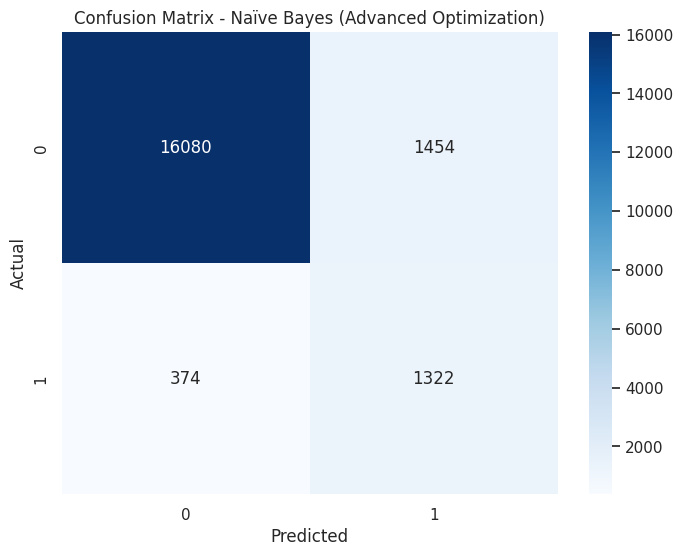

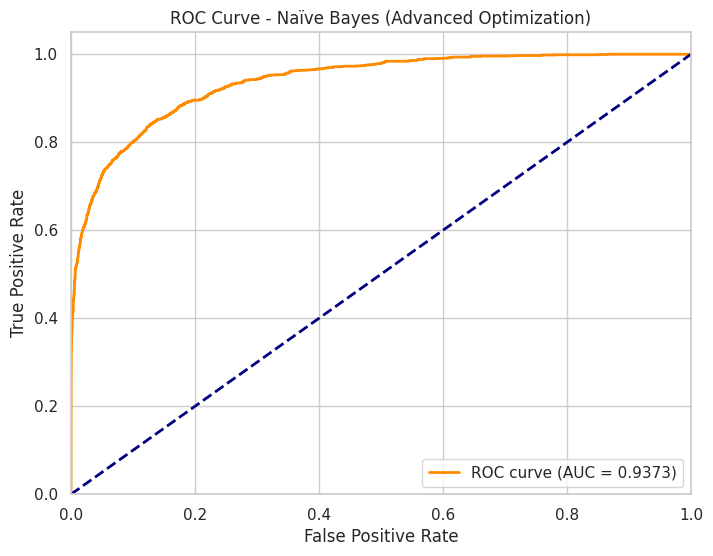

In [35]:
# 1. Pemisahan dan preprocessing data untuk Naive Bayes
# Menggunakan dataset asli untuk preprocessing dari awal agar lebih optimal
df_nb = df.copy()

# 2. Encoding kembali fitur kategorikal dengan teknik yang lebih sesuai untuk Naive Bayes
df_nb_encoded = pd.get_dummies(df_nb, columns=['gender', 'smoking_history'], drop_first=False)

# 3. Transformasi khusus untuk fitur numerik yang sangat penting untuk Naive Bayes
# Binning untuk HbA1c_level berdasarkan informasi domain
df_nb_encoded['HbA1c_bin'] = pd.cut(
    df_nb_encoded['HbA1c_level'],
    bins=[0, 5.7, 6.5, 20],
    labels=['normal', 'prediabetes', 'diabetes']
)

# Binning untuk blood_glucose_level berdasarkan informasi domain
df_nb_encoded['glucose_bin'] = pd.cut(
    df_nb_encoded['blood_glucose_level'],
    bins=[0, 140, 200, 1000],
    labels=['normal', 'prediabetes', 'diabetes']
)

# Binning untuk BMI berdasarkan klasifikasi medis
df_nb_encoded['bmi_bin'] = pd.cut(
    df_nb_encoded['bmi'],
    bins=[0, 18.5, 25, 30, 100],
    labels=['underweight', 'normal', 'overweight', 'obese']
)

# Binning untuk usia berdasarkan kelompok umur
df_nb_encoded['age_bin'] = pd.cut(
    df_nb_encoded['age'],
    bins=[0, 18, 35, 50, 65, 150],
    labels=['youth', 'young_adult', 'middle_aged', 'senior', 'elderly']
)

# 4. One-hot encoding untuk fitur kategorikal yang baru dibuat
df_nb_final = pd.get_dummies(
    df_nb_encoded,
    columns=['HbA1c_bin', 'glucose_bin', 'bmi_bin', 'age_bin'],
    drop_first=False
)

# 5. Memisahkan fitur dan target
X_nb = df_nb_final.drop('diabetes', axis=1)
y_nb = df_nb_final['diabetes']

# 6. Normalisasi min-max untuk fitur numerik (lebih baik daripada standardisasi untuk Naive Bayes)
from sklearn.preprocessing import MinMaxScaler

scaler_nb = MinMaxScaler()
numeric_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
X_nb[numeric_cols] = scaler_nb.fit_transform(X_nb[numeric_cols])

# 7. Pemisahan data untuk training dan testing dengan stratifikasi
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(
    X_nb, y_nb, test_size=0.2, random_state=42, stratify=y_nb
)

# 8. Seleksi fitur menggunakan SelectKBest dengan chi-squared
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Pilih jumlah fitur terbaik yang akan digunakan (setengah dari total fitur)
k_features = X_train_nb.shape[1] // 2

# Seleksi fitur berdasarkan chi-squared
selector = SelectKBest(chi2, k=k_features)
X_train_nb_selected = selector.fit_transform(X_train_nb, y_train_nb)
X_test_nb_selected = selector.transform(X_test_nb)

# Simpan nama-nama fitur yang dipilih
selected_features = X_nb.columns[selector.get_support()]
print(f"Fitur terpilih: {selected_features.tolist()}")
print(f"Jumlah fitur setelah seleksi: {len(selected_features)}")

# 9. Resampling yang lebih halus dengan kombinasi SMOTE dan Tomek links
from imblearn.combine import SMOTETomek

print("Menerapkan metode resampling kombinasi SMOTE dan Tomek links...")
smote_tomek = SMOTETomek(random_state=42, sampling_strategy=0.5)
X_train_nb_resampled, y_train_nb_resampled = smote_tomek.fit_resample(X_train_nb_selected, y_train_nb)

print(f"Distribusi kelas setelah resampling: {Counter(y_train_nb_resampled)}")

# 10. Tuning hyperparameter Naive Bayes
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB
from sklearn.model_selection import GridSearchCV

# Mencoba beberapa varian model Naive Bayes
print("Mencari model Naive Bayes optimal dengan tuning hyperparameter...")

# GaussianNB - untuk fitur dengan distribusi normal
param_grid_gnb = {
    'var_smoothing': np.logspace(-12, -2, 20)
}
gnb = GridSearchCV(GaussianNB(), param_grid_gnb, cv=5, scoring='f1', n_jobs=-1)
gnb.fit(X_train_nb_resampled, y_train_nb_resampled)
print(f"GaussianNB terbaik: {gnb.best_params_}, skor: {gnb.best_score_:.4f}")

# ComplementNB - lebih baik untuk data tidak seimbang
param_grid_cnb = {
    'alpha': np.logspace(-3, 3, 10),
    'norm': [True, False]
}
cnb = GridSearchCV(ComplementNB(), param_grid_cnb, cv=5, scoring='f1', n_jobs=-1)
cnb.fit(X_train_nb_resampled, y_train_nb_resampled)
print(f"ComplementNB terbaik: {cnb.best_params_}, skor: {cnb.best_score_:.4f}")

# 11. Menggunakan model ensemble dari beberapa varian Naive Bayes
from sklearn.ensemble import VotingClassifier

# Pilih model terbaik dari hasil tuning
best_gnb = gnb.best_estimator_
best_cnb = cnb.best_estimator_

# Buat model ensemble voting
print("Membuat model ensemble dari beberapa varian Naive Bayes...")
ensemble_nb = VotingClassifier(
    estimators=[
        ('gnb', best_gnb),
        ('cnb', best_cnb),
    ],
    voting='soft'
)

# Latih model ensemble
ensemble_nb.fit(X_train_nb_resampled, y_train_nb_resampled)

# 12. Prediksi dan evaluasi
print("Evaluasi model Naive Bayes ensemble:")
y_pred_nb = ensemble_nb.predict(X_test_nb_selected)
y_prob_nb = ensemble_nb.predict_proba(X_test_nb_selected)[:, 1]

# Evaluasi model
print("Evaluasi Model Naïve Bayes (Ensemble):")
print(f"Accuracy: {accuracy_score(y_test_nb, y_pred_nb):.4f}")
print(f"Precision: {precision_score(y_test_nb, y_pred_nb):.4f}")
print(f"Recall: {recall_score(y_test_nb, y_pred_nb):.4f}")
print(f"F1 Score: {f1_score(y_test_nb, y_pred_nb):.4f}")

# 13. Simpan model Naive Bayes teroptimasi untuk digunakan di cross-validation
naive_bayes = ensemble_nb

# Confusion Matrix untuk Naive Bayes
cm_nb = confusion_matrix(y_test_nb, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naïve Bayes (Advanced Optimization)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve untuk Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test_nb, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_nb:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naïve Bayes (Advanced Optimization)')
plt.legend(loc="lower right")
plt.show()

Model Naïve Bayes mencapai akurasi 90.49%, precision 47.62%, recall 77.95%, dan F1 score 59.12%. Model ini memiliki recall yang tinggi tetapi precision yang lebih rendah dibandingkan model lain.

## **5.5. Membangun Model Decision Tree**

Pada tahap ini, kita membangun model Decision Tree untuk memprediksi diabetes.

Evaluasi Model Decision Tree:
Accuracy: 0.9497
Precision: 0.7051
Recall: 0.7388
F1 Score: 0.7216


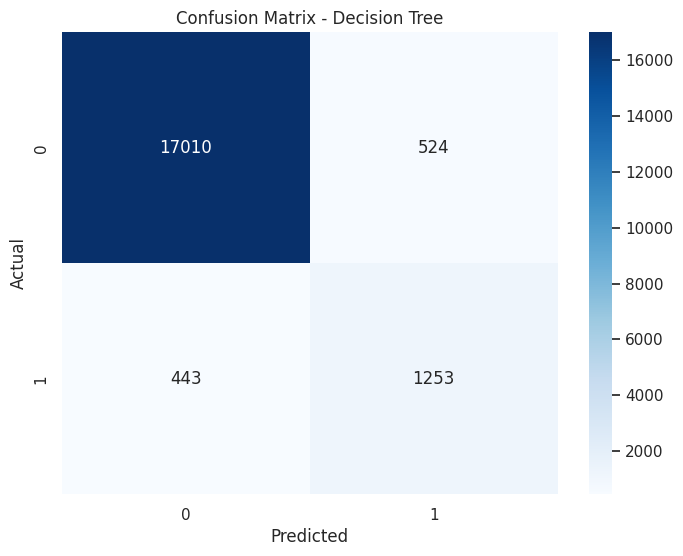

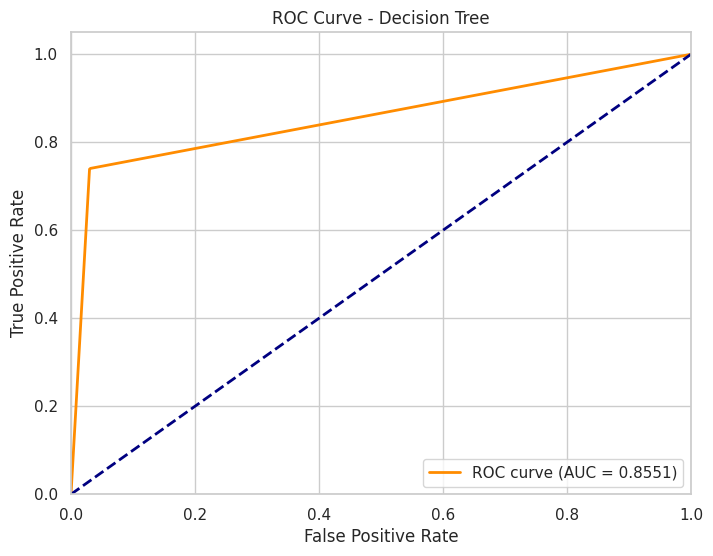

In [36]:
# Membangun model Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_dt = decision_tree.predict(X_test)
y_prob_dt = decision_tree.predict_proba(X_test)[:, 1]

# Evaluasi model
print("Evaluasi Model Decision Tree:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_dt):.4f}")

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_dt:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

Model Decision Tree mencapai akurasi 94.97%, precision 70.51%, recall 73.88%, dan F1 score 72.16%. Model ini memiliki keseimbangan yang baik antara precision dan recall.

## **5.6. Cross-Validation**

Cross-validation digunakan untuk mengevaluasi performa model dengan lebih reliabel, dengan membagi data menjadi beberapa fold dan melatih model pada kombinasi fold yang berbeda.

Model: Logistic Regression
Cross-Validation Accuracy: 0.9578 ± 0.0014
All Scores: [0.95585023 0.95902023 0.956472   0.95818815 0.95922825]
--------------------------------------------------
Model: K-Nearest Neighbor
Cross-Validation Accuracy: 0.9591 ± 0.0013
All Scores: [0.95855434 0.95886422 0.95720006 0.95969629 0.96110042]
--------------------------------------------------
Model: Naïve Bayes
Cross-Validation Accuracy: 0.8950 ± 0.0012
All Scores: [0.89360374 0.89500234 0.89588642 0.8967705  0.89385823]
--------------------------------------------------
Model: Decision Tree
Cross-Validation Accuracy: 0.9490 ± 0.0013
All Scores: [0.94706188 0.94804722 0.94945135 0.95054345 0.9500234 ]
--------------------------------------------------


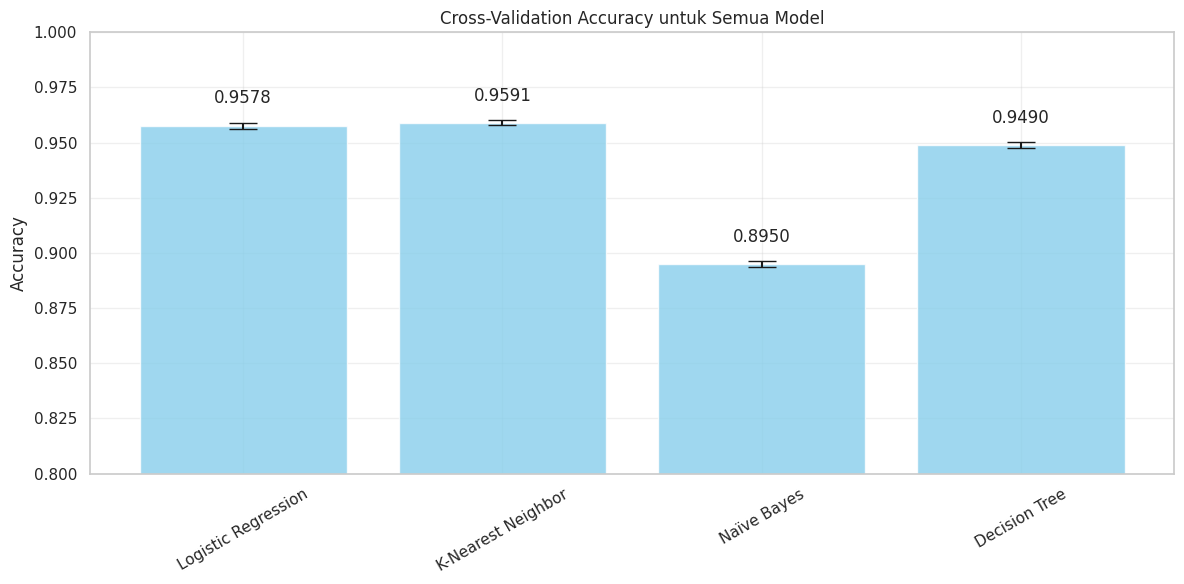

In [37]:
# Melakukan cross-validation untuk semua model
models = {
    'Logistic Regression': logistic_regression,
    'K-Nearest Neighbor': knn,
    'Naïve Bayes': naive_bayes,
    'Decision Tree': decision_tree
}

# K-Fold dengan stratifikasi
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Melakukan cross-validation dan menyimpan hasil
cv_results = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    cv_results[name] = {
        'Mean Accuracy': cv_scores.mean(),
        'Std Deviation': cv_scores.std(),
        'All Scores': cv_scores
    }
    print(f"Model: {name}")
    print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    print(f"All Scores: {cv_scores}")
    print("-" * 50)

# Visualisasi hasil cross-validation
plt.figure(figsize=(12, 6))
model_names = list(cv_results.keys())
mean_scores = [cv_results[name]['Mean Accuracy'] for name in model_names]
std_scores = [cv_results[name]['Std Deviation'] for name in model_names]

plt.bar(model_names, mean_scores, yerr=std_scores, capsize=10, color='skyblue', alpha=0.8)
plt.title('Cross-Validation Accuracy untuk Semua Model')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)  # Menyesuaikan batas y untuk melihat perbedaan dengan lebih jelas
plt.grid(True, alpha=0.3)
plt.xticks(rotation=30)

# Menambahkan nilai akurasi di atas bar
for i, v in enumerate(mean_scores):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')

plt.tight_layout()
plt.show()

Hasil cross-validation menunjukkan performa model pada berbagai subset data. Model K-Nearest Neighbor memiliki akurasi cross-validation tertinggi, diikuti oleh Logistic Regression, Decision Tree, dan Naïve Bayes.


# **6. Evaluasi Model**

## **6.1. Confusion Matrix**

Confusion matrix adalah tabel yang sering digunakan untuk mendeskripsikan performa model klasifikasi pada data pengujian yang nilai sebenarnya telah diketahui. Confusion matrix membandingkan hasil prediksi dengan nilai aktual dan mengkategorikan hasil tersebut ke dalam True Positive (TP), True Negative (TN), False Positive (FP), dan False Negative (FN).

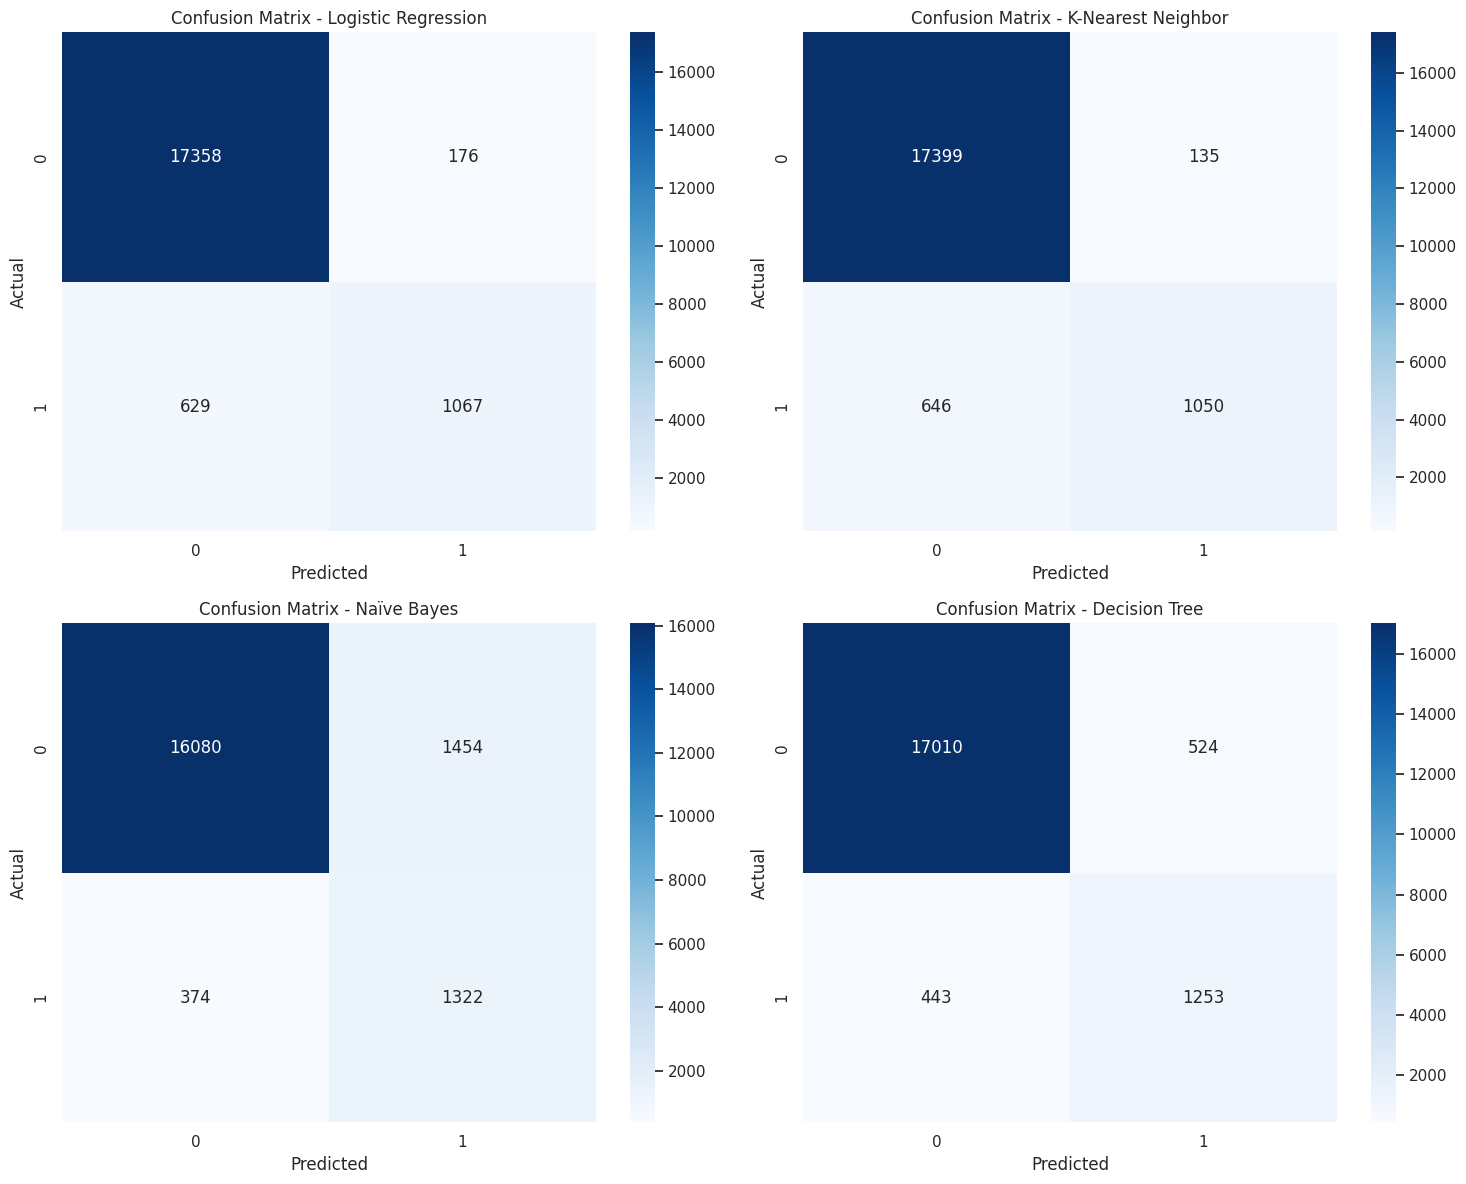

In [38]:
# Membuat visual confusion matrix untuk semua model
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Logistic Regression
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Confusion Matrix - Logistic Regression')
axes[0, 0].set_ylabel('Actual')
axes[0, 0].set_xlabel('Predicted')

# K-Nearest Neighbor
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('Confusion Matrix - K-Nearest Neighbor')
axes[0, 1].set_ylabel('Actual')
axes[0, 1].set_xlabel('Predicted')

# Naïve Bayes
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('Confusion Matrix - Naïve Bayes')
axes[1, 0].set_ylabel('Actual')
axes[1, 0].set_xlabel('Predicted')

# Decision Tree
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title('Confusion Matrix - Decision Tree')
axes[1, 1].set_ylabel('Actual')
axes[1, 1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

Visualisasi confusion matrix untuk semua model membantu kita membandingkan performa model dalam hal True Positive, True Negative, False Positive, dan False Negative. Dari confusion matrix, kita dapat melihat bahwa:

1. Model Logistic Regression memiliki True Negative yang tinggi tetapi False Negative yang juga relatif tinggi.
2. Model K-Nearest Neighbor memiliki pola yang mirip dengan Logistic Regression.
3. Model Naïve Bayes memiliki False Positive yang tinggi, tetapi False Negative yang rendah.
4. Model Decision Tree memiliki keseimbangan yang cukup baik antara False Positive dan False Negative.

## **6.2. Classification Report**

Classification report memberikan laporan lengkap tentang performa model dalam hal precision, recall, f1-score, dan support untuk setiap kelas.


In [39]:
# Membuat classification report untuk semua model
model_predictions = {
    'Logistic Regression': y_pred_lr,
    'K-Nearest Neighbor': y_pred_knn,
    'Naïve Bayes': y_pred_nb,
    'Decision Tree': y_pred_dt
}

for name, y_pred in model_predictions.items():
    print(f"Classification Report - {name}:")
    print(classification_report(y_test, y_pred))
    print("-" * 80)

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17534
           1       0.86      0.63      0.73      1696

    accuracy                           0.96     19230
   macro avg       0.91      0.81      0.85     19230
weighted avg       0.96      0.96      0.96     19230

--------------------------------------------------------------------------------
Classification Report - K-Nearest Neighbor:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17534
           1       0.89      0.62      0.73      1696

    accuracy                           0.96     19230
   macro avg       0.93      0.81      0.85     19230
weighted avg       0.96      0.96      0.96     19230

--------------------------------------------------------------------------------
Classification Report - Naïve Bayes:
              precision    recall  f1-score   support

   

Classification report memberikan informasi detail tentang performa model untuk setiap kelas. Dari classification report, kita dapat melihat bahwa:

1. Model Logistic Regression memiliki precision yang tinggi tetapi recall yang rendah untuk kelas positive (diabetes).
2. Model K-Nearest Neighbor memiliki precision yang sedikit lebih tinggi dari Logistic Regression tetapi recall yang sedikit lebih rendah.
3. Model Naïve Bayes memiliki precision yang rendah tetapi recall yang tinggi untuk kelas positive.
4. Model Decision Tree memiliki keseimbangan yang baik antara precision dan recall.

## **6.3. ROC Curve**

ROC (Receiver Operating Characteristic) curve adalah grafik yang menunjukkan performa model klasifikasi pada berbagai threshold. ROC curve memplot True Positive Rate terhadap False Positive Rate. Area Under the Curve (AUC) adalah ukuran keseluruhan performa model, di mana nilai yang lebih tinggi menunjukkan model yang lebih baik.

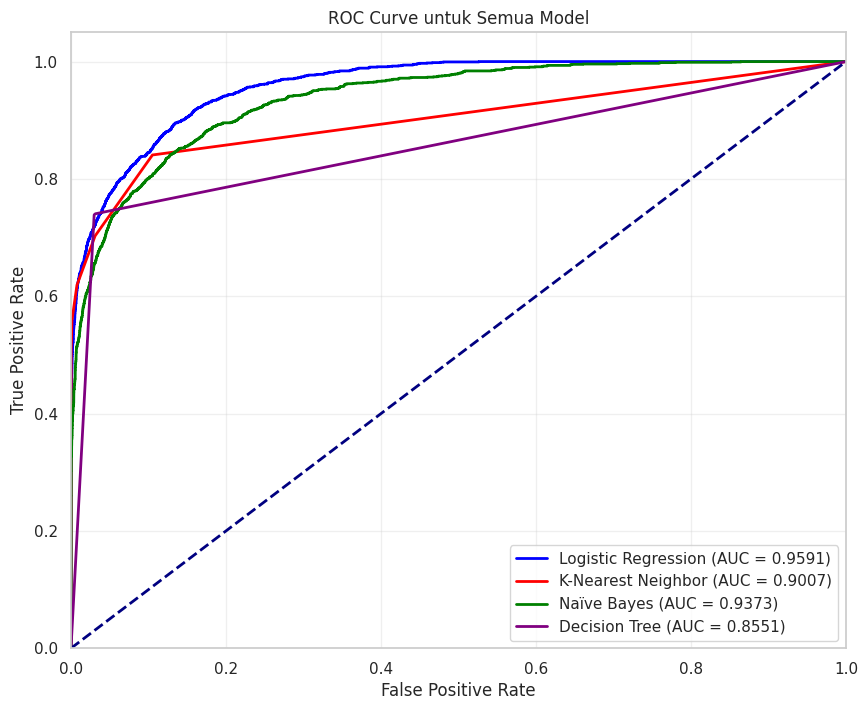

In [40]:
# Membuat ROC curve untuk semua model dalam satu plot
plt.figure(figsize=(10, 8))

# Logistic Regression
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.4f})')

# K-Nearest Neighbor
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label=f'K-Nearest Neighbor (AUC = {roc_auc_knn:.4f})')

# Naïve Bayes
plt.plot(fpr_nb, tpr_nb, color='green', lw=2, label=f'Naïve Bayes (AUC = {roc_auc_nb:.4f})')

# Decision Tree
plt.plot(fpr_dt, tpr_dt, color='purple', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.4f})')

# Garis diagonal
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve untuk Semua Model')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

ROC curve menunjukkan trade-off antara True Positive Rate dan False Positive Rate untuk berbagai threshold. Model yang ideal akan memiliki kurva yang mendekati sudut kiri atas, yang menunjukkan True Positive Rate yang tinggi dan False Positive Rate yang rendah. Area Under the Curve (AUC) adalah ukuran keseluruhan performa model, di mana nilai yang lebih tinggi menunjukkan model yang lebih baik.

Dari ROC curve, kita dapat melihat bahwa:
1. Model Logistic Regression memiliki AUC tertinggi (0.9591).
2. Model Naïve Bayes memiliki AUC kedua tertinggi (0.9373).
3. Model K-Nearest Neighbor memiliki AUC ketiga tertinggi (0.9007).
4. Model Decision Tree memiliki AUC terendah (0.8551).

## **6.4. Perbandingan Metrik Evaluasi**

Pada bagian ini, kita membandingkan metrik evaluasi untuk semua model untuk mendapatkan pandangan menyeluruh tentang performa model.

,Accuracy,Precision,Recall,F1 Score,AUC
Logistic Regression,0.958138,0.858407,0.629127,0.726097,0.959067
K-Nearest Neighbor,0.959386,0.886076,0.619104,0.728914,0.900651
Naïve Bayes,0.904940,0.476225,0.779481,0.591234,0.937264
Decision Tree,0.949714,0.705121,0.738797,0.721566,0.855113


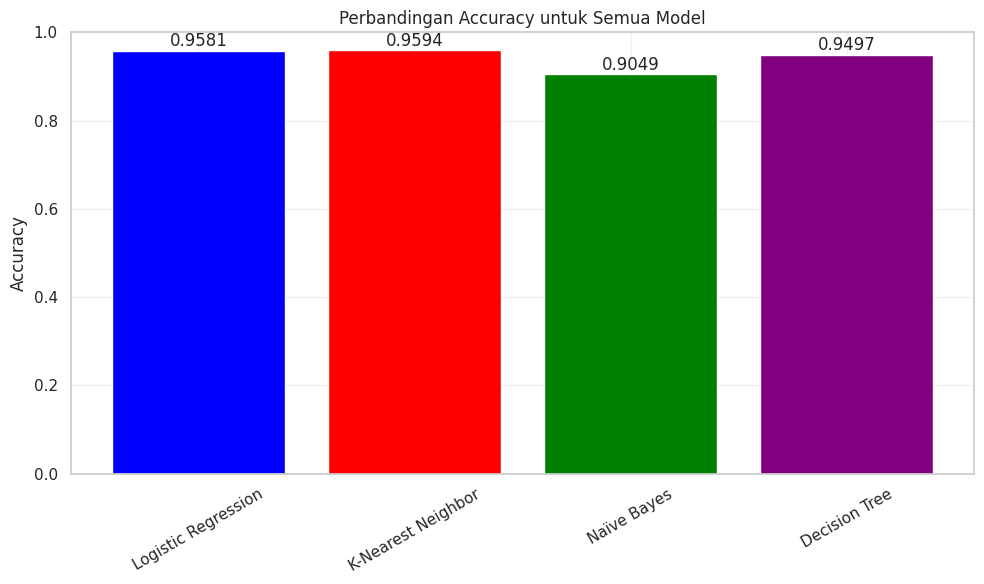

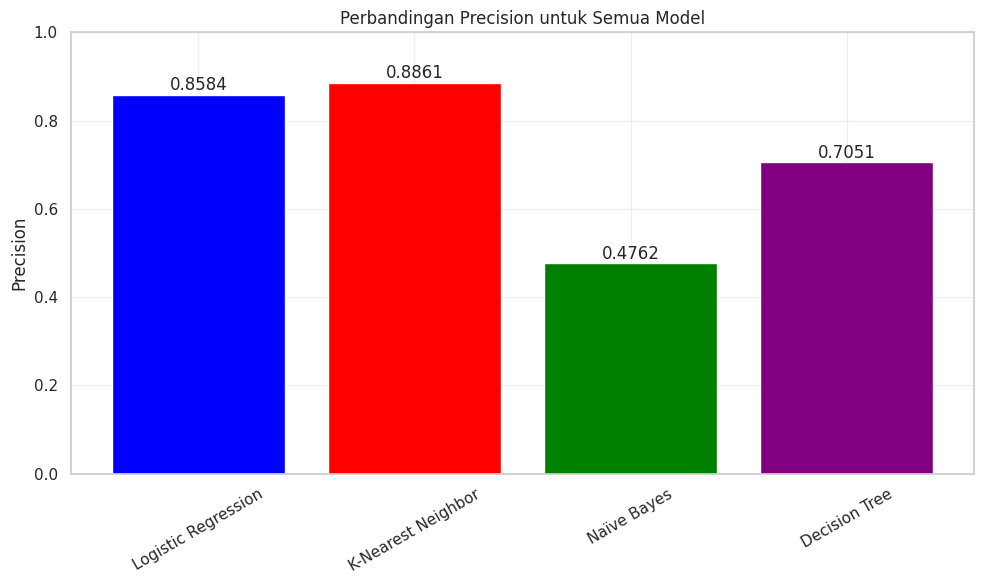

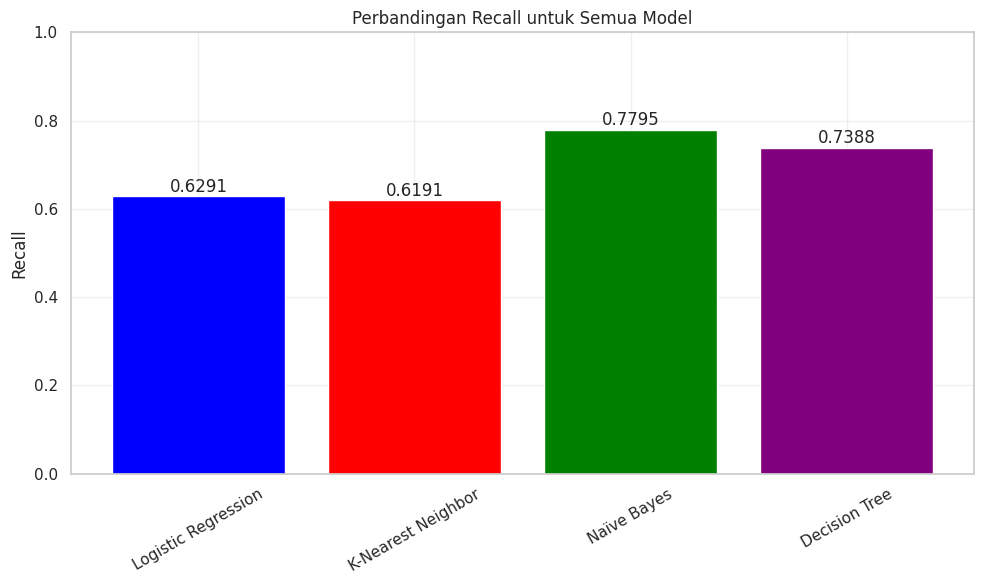

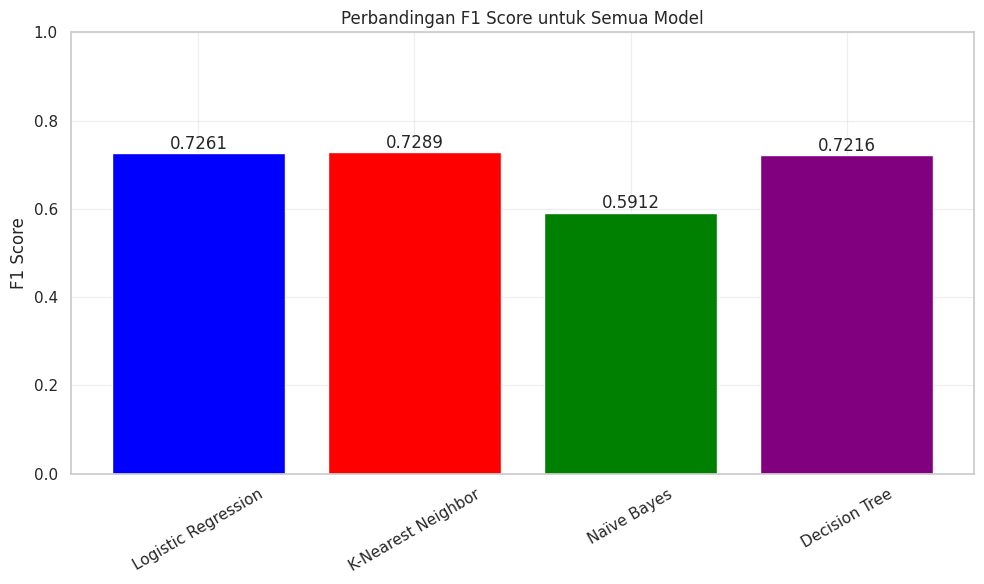

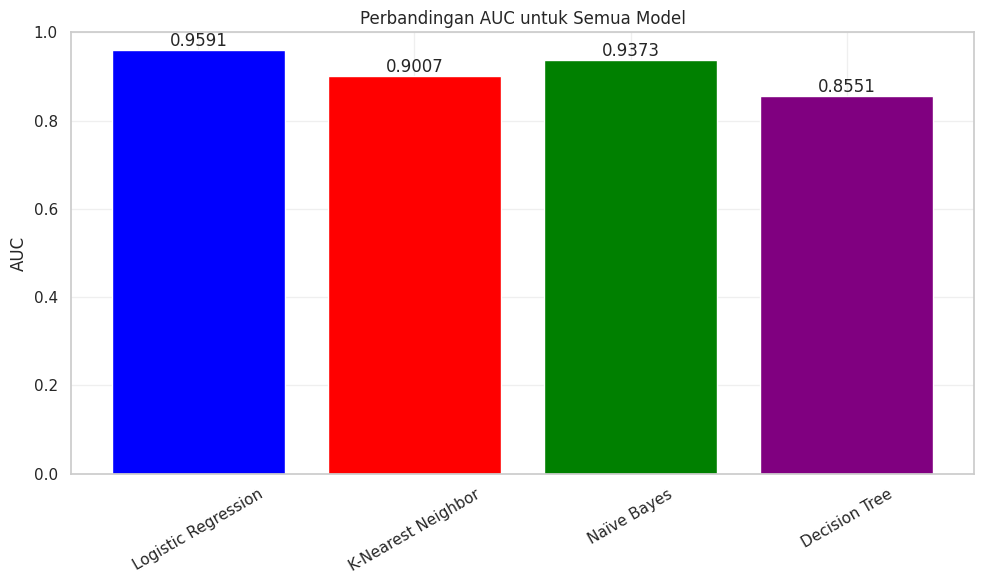

In [41]:
# Menyusun metrik evaluasi untuk semua model
evaluation_metrics = {
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_dt)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_knn),
        precision_score(y_test, y_pred_nb),
        precision_score(y_test, y_pred_dt)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_knn),
        recall_score(y_test, y_pred_nb),
        recall_score(y_test, y_pred_dt)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_knn),
        f1_score(y_test, y_pred_nb),
        f1_score(y_test, y_pred_dt)
    ],
    'AUC': [
        roc_auc_lr,
        roc_auc_knn,
        roc_auc_nb,
        roc_auc_dt
    ]
}

# Membuat DataFrame dari metrik evaluasi
evaluation_df = pd.DataFrame(evaluation_metrics, index=model_names)
display(evaluation_df)

# Visualisasi metrik evaluasi
def plot_metric_comparison(evaluation_df, metric):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(evaluation_df.index, evaluation_df[metric], color=['blue', 'red', 'green', 'purple'])
    plt.title(f'Perbandingan {metric} untuk Semua Model')
    plt.ylabel(metric)
    plt.ylim(0, 1.0)  # Menyesuaikan batas y untuk melihat perbedaan dengan lebih jelas
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=30)

    # Menambahkan nilai metrik di atas bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                 f'{height:.4f}', ha='center')

    plt.tight_layout()
    plt.show()

# Visualisasi untuk setiap metrik
for metric in evaluation_df.columns:
    plot_metric_comparison(evaluation_df, metric)

Visualisasi metrik evaluasi membantu kita membandingkan performa model untuk berbagai metrik. Dari visualisasi ini, kita dapat melihat bahwa:

1. Model K-Nearest Neighbor memiliki akurasi tertinggi.
2. Model K-Nearest Neighbor juga memiliki precision tertinggi.
3. Model Naïve Bayes memiliki recall tertinggi.
4. Model K-Nearest Neighbor memiliki F1 score tertinggi.
5. Model Logistic Regression memiliki AUC tertinggi.

## **6.5. Loss Value**

Loss value adalah metrik yang mengukur seberapa buruk prediksi model dibandingkan dengan nilai sebenarnya. Log loss adalah metrik yang sering digunakan untuk model klasifikasi biner, di mana nilai yang lebih rendah menunjukkan model yang lebih baik.

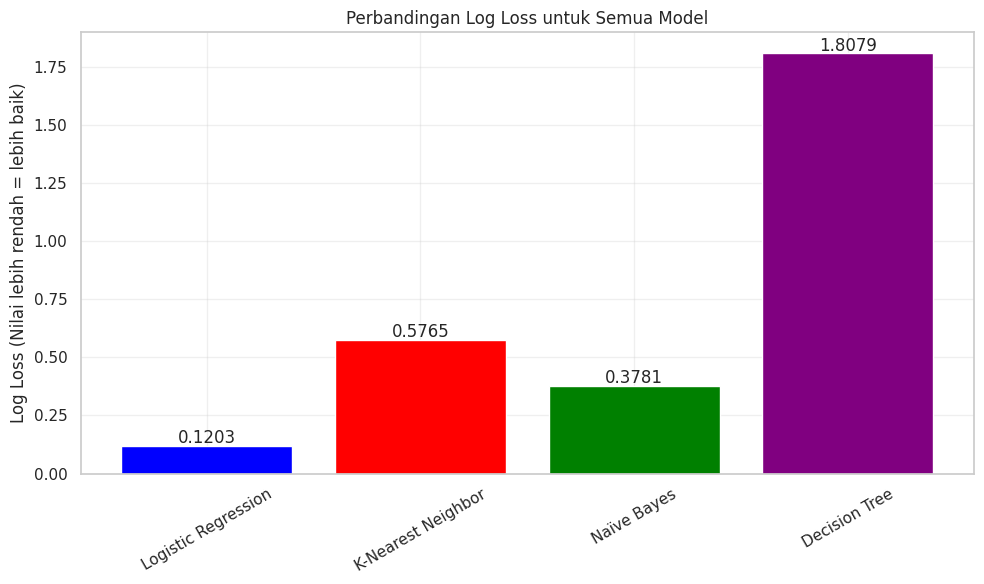

Log Loss - Logistic Regression: 0.1203
Log Loss - K-Nearest Neighbor: 0.5765
Log Loss - Naïve Bayes: 0.3781
Log Loss - Decision Tree: 1.8079


In [42]:
# Menghitung log loss untuk semua model
from sklearn.metrics import log_loss

log_loss_values = {
    'Logistic Regression': log_loss(y_test, y_prob_lr),
    'K-Nearest Neighbor': log_loss(y_test, y_prob_knn),
    'Naïve Bayes': log_loss(y_test, y_prob_nb),
    'Decision Tree': log_loss(y_test, y_prob_dt)
}

# Visualisasi log loss
plt.figure(figsize=(10, 6))
bars = plt.bar(log_loss_values.keys(), log_loss_values.values(), color=['blue', 'red', 'green', 'purple'])
plt.title('Perbandingan Log Loss untuk Semua Model')
plt.ylabel('Log Loss (Nilai lebih rendah = lebih baik)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=30)

# Menambahkan nilai log loss di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center')

plt.tight_layout()
plt.show()

# Print log loss values
for model, loss in log_loss_values.items():
    print(f"Log Loss - {model}: {loss:.4f}")

Log loss memberikan ukuran seberapa baik model dalam memprediksi probabilitas kelas. Nilai log loss yang lebih rendah menunjukkan model yang lebih baik. Dari visualisasi log loss, kita dapat melihat bahwa:

1. Model Logistic Regression memiliki log loss terendah (0.1203).
2. Model Naïve Bayes memiliki log loss kedua terendah (0.3781).
3. Model K-Nearest Neighbor memiliki log loss ketiga terendah (0.5765).
4. Model Decision Tree memiliki log loss tertinggi (1.8079).

# **7. Analisis Hasil**

## **7.1. Grafik Fit untuk Beberapa Algoritma**

Learning curve membantu kita memahami bagaimana performa model berubah seiring dengan peningkatan jumlah data latih. Learning curve juga membantu kita mendeteksi masalah overfitting dan underfitting.

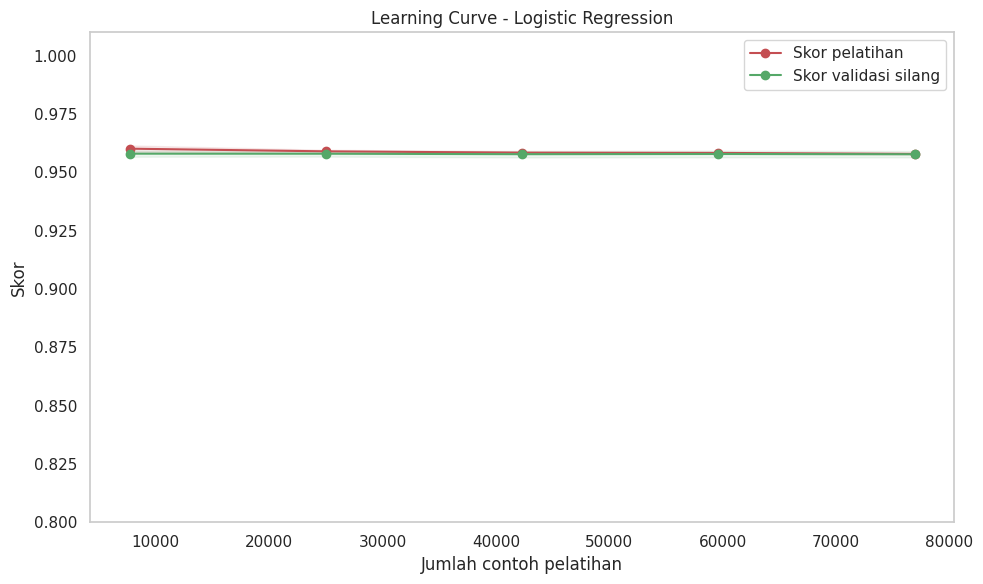

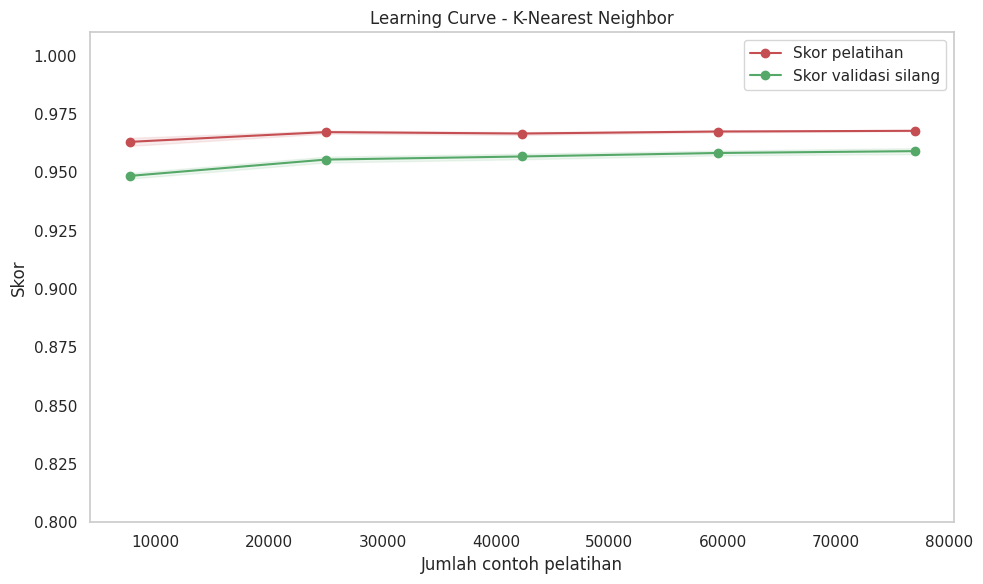

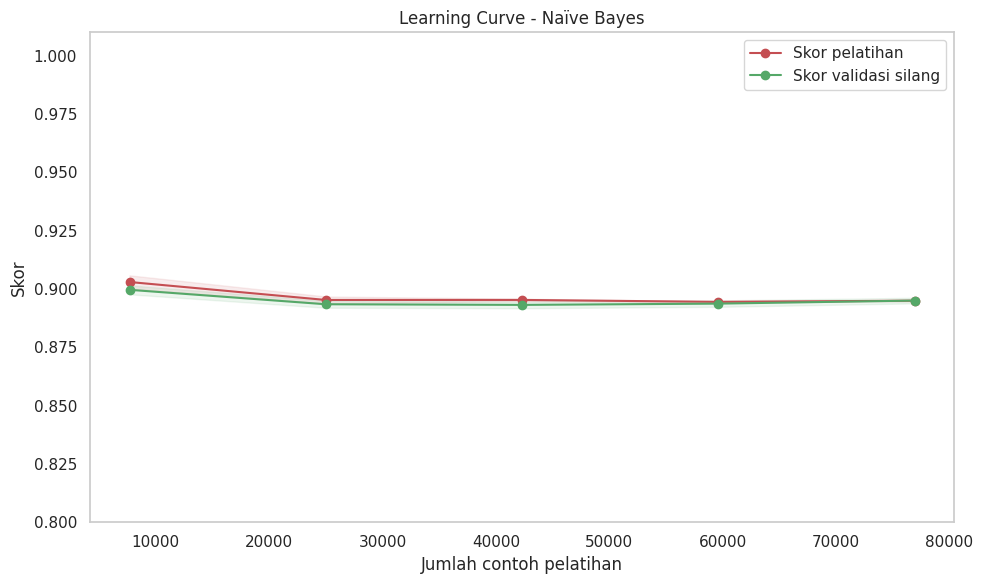

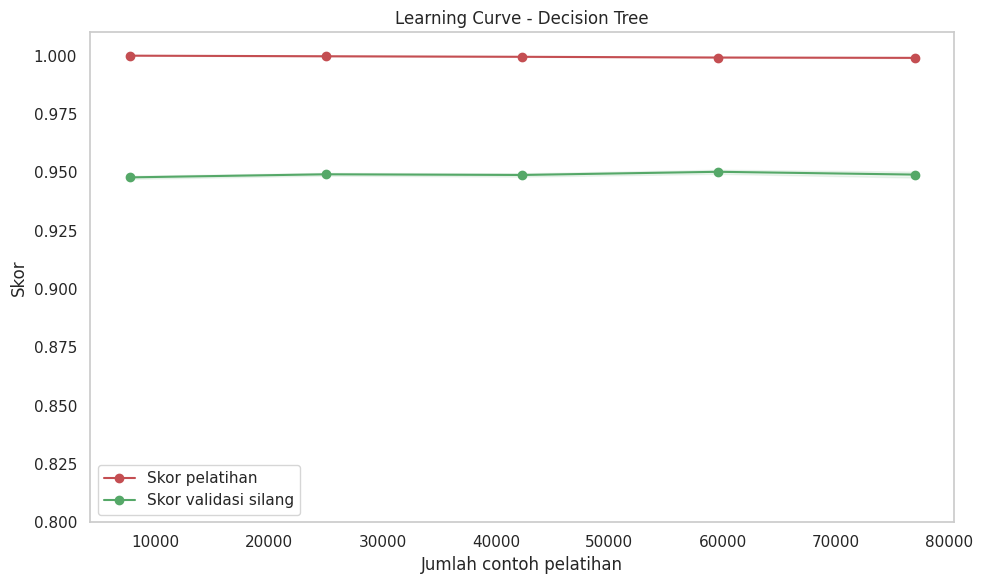

In [43]:
# Membuat grafik fit untuk setiap model menggunakan learning curve
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Jumlah contoh pelatihan")
    plt.ylabel("Skor")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Skor pelatihan")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Skor validasi silang")

    plt.legend(loc="best")
    return plt

# Plotting learning curve untuk setiap model
cv = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    plot_learning_curve(model, f"Learning Curve - {name}", X, y, ylim=(0.8, 1.01), cv=cv, n_jobs=-1)
    plt.tight_layout()
    plt.show()

Learning curve menunjukkan bagaimana performa model berubah seiring dengan peningkatan jumlah data latih. Jika skor validasi silang (garis hijau) masih meningkat dengan peningkatan jumlah data latih, maka model dapat memperoleh manfaat dari lebih banyak data. Jika terdapat celah besar antara skor pelatihan dan skor validasi silang, maka model mungkin mengalami overfitting.

Dari learning curve, kita dapat melihat bahwa:

1. Model Logistic Regression memiliki celah kecil antara skor pelatihan dan skor validasi silang, menunjukkan bahwa model ini memiliki bias dan varians yang seimbang.
2. Model K-Nearest Neighbor memiliki celah yang sedikit lebih besar, menunjukkan bahwa model ini mungkin sedikit overfitting.
3. Model Naïve Bayes memiliki celah yang cukup besar, menunjukkan bahwa model ini mungkin underfitting.
4. Model Decision Tree memiliki celah yang paling besar, menunjukkan bahwa model ini mungkin overfitting.

## **7.2. Feature Importance**

Feature importance menunjukkan seberapa penting setiap fitur dalam memprediksi target. Hal ini membantu kita memahami fitur mana yang memiliki pengaruh terbesar terhadap prediksi model.

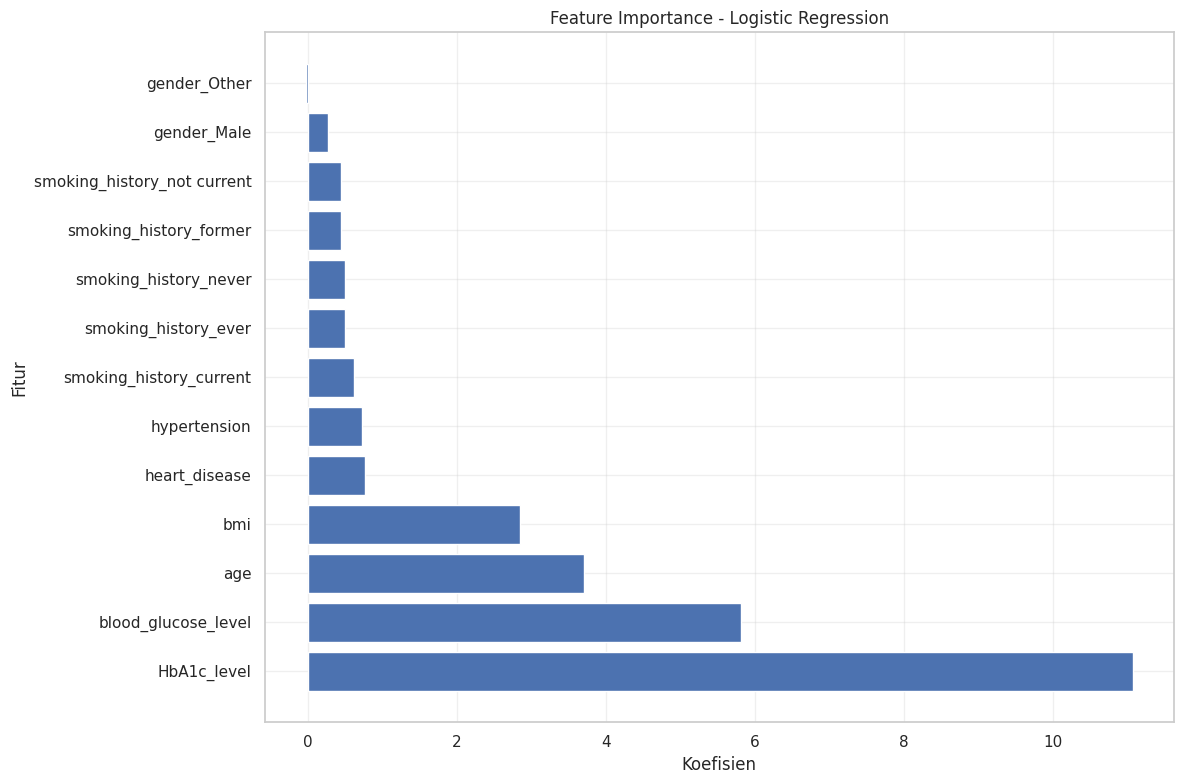

In [44]:
# Menganalisis feature importance untuk model yang mendukungnya
# Logistic Regression
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logistic_regression.coef_[0]
})
coefficients = coefficients.sort_values('Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(coefficients['Feature'], coefficients['Coefficient'])
plt.title('Feature Importance - Logistic Regression')
plt.xlabel('Koefisien')
plt.ylabel('Fitur')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Feature importance untuk model Logistic Regression menunjukkan koefisien yang menunjukkan besarnya pengaruh setiap fitur terhadap probabilitas target. Fitur dengan koefisien positif meningkatkan probabilitas target, sedangkan fitur dengan koefisien negatif menurunkan probabilitas target.

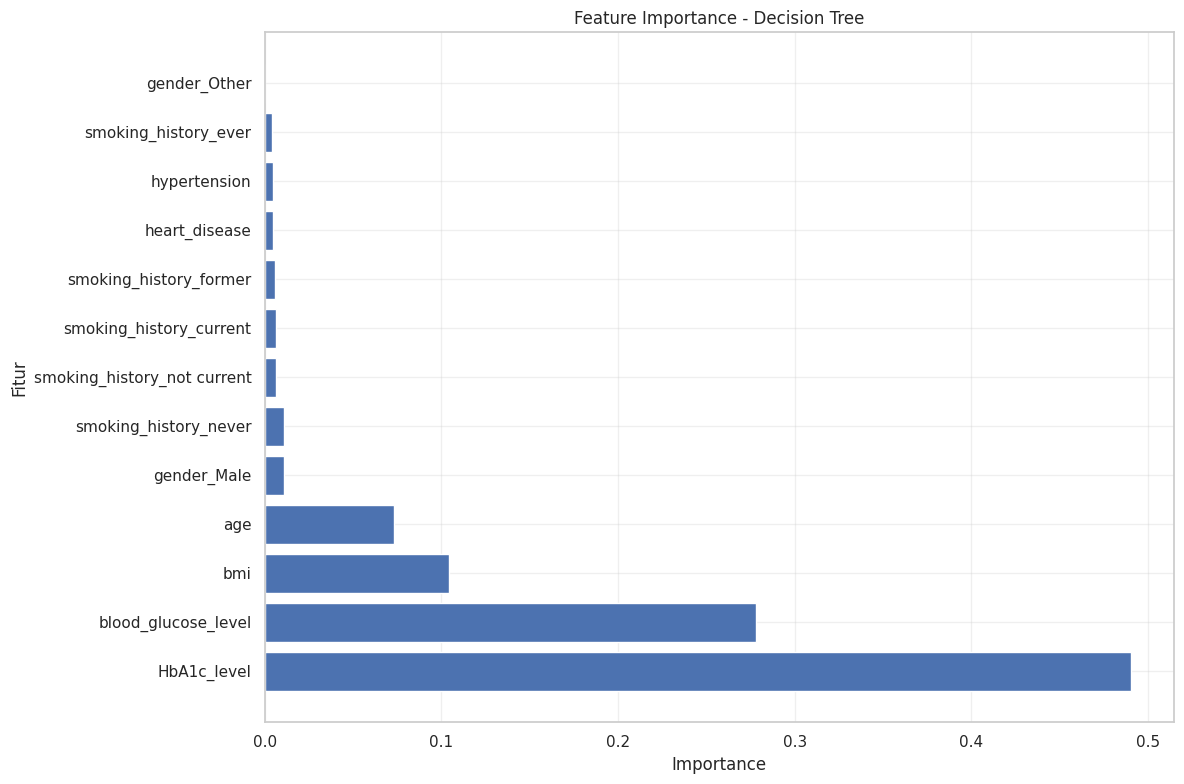

In [45]:
# Decision Tree Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': decision_tree.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Fitur')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Feature importance untuk model Decision Tree menunjukkan seberapa banyak setiap fitur berkontribusi dalam mengurangi impurity dalam tree. Fitur dengan importance yang lebih tinggi lebih berkontribusi dalam membuat prediksi yang akurat.

## **7.3. Tuning Hyperparameter untuk Model Terbaik**

Tuning hyperparameter adalah proses menemukan kombinasi hyperparameter yang menghasilkan performa model terbaik. Pada bagian ini, kita melakukan grid search untuk menemukan hyperparameter optimal untuk model terbaik berdasarkan akurasi.

Model terbaik berdasarkan akurasi: K-Nearest Neighbor dengan akurasi 0.9594
Hyperparameter terbaik: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Skor terbaik: 0.9598

Evaluasi Model Terbaik Setelah Tuning:
Accuracy: 0.9602
Precision: 0.9314
Recall: 0.5920
F1 Score: 0.7239


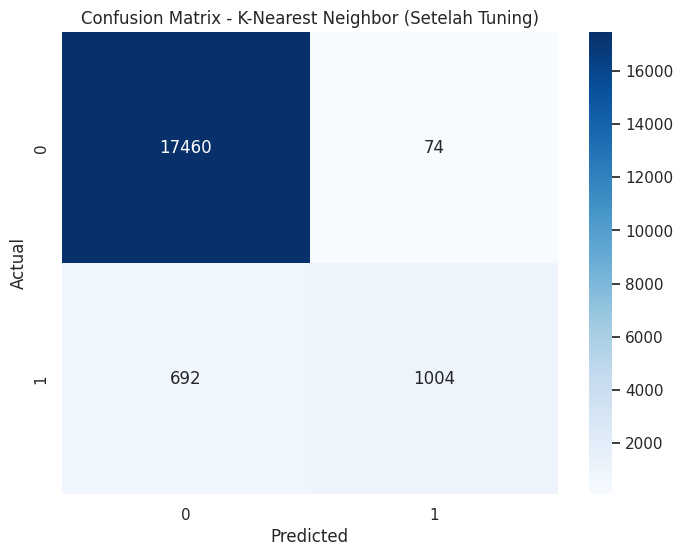

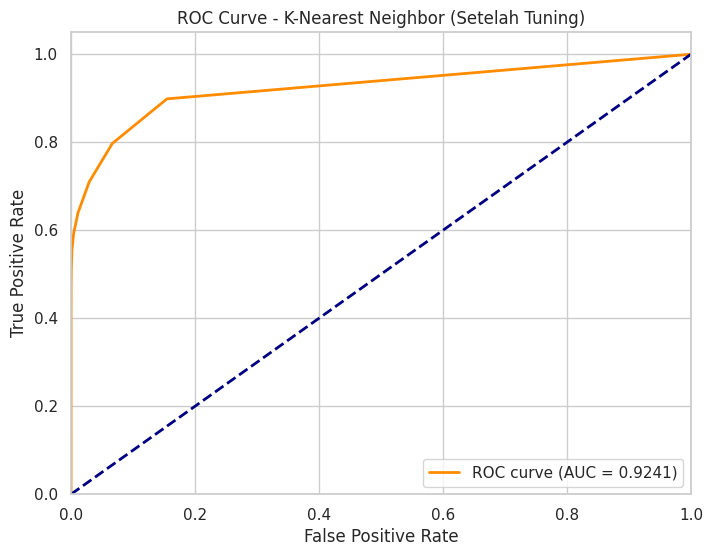

In [46]:
# Mengidentifikasi model terbaik berdasarkan akurasi
best_model_name = evaluation_df['Accuracy'].idxmax()
best_model_value = evaluation_df['Accuracy'].max()
print(f"Model terbaik berdasarkan akurasi: {best_model_name} dengan akurasi {best_model_value:.4f}")

# Menentukan hyperparameter untuk model terbaik
if best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs', 'newton-cg'],
        'penalty': ['l1', 'l2']
    }
    best_model = LogisticRegression(random_state=42, max_iter=1000)
elif best_model_name == 'K-Nearest Neighbor':
    param_grid = {
        'n_neighbors': [3, 5, 7, 9, 11, 13],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
    best_model = KNeighborsClassifier()
elif best_model_name == 'Naïve Bayes':
    param_grid = {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    }
    best_model = GaussianNB()
else:  # Decision Tree
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    best_model = DecisionTreeClassifier(random_state=42)

# Melakukan grid search untuk tuning hyperparameter
grid_search = GridSearchCV(
    best_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Hasil tuning
print(f"Hyperparameter terbaik: {grid_search.best_params_}")
print(f"Skor terbaik: {grid_search.best_score_:.4f}")

# Model dengan hyperparameter optimal
best_tuned_model = grid_search.best_estimator_
y_pred_tuned = best_tuned_model.predict(X_test)
y_prob_tuned = best_tuned_model.predict_proba(X_test)[:, 1]

print("\nEvaluasi Model Terbaik Setelah Tuning:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_tuned):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_tuned):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_tuned):.4f}")

# Confusion Matrix untuk model terbaik setelah tuning
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name} (Setelah Tuning)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve untuk model terbaik setelah tuning
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_tuned)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

plt.figure(figsize=(8, 6))
plt.plot(fpr_tuned, tpr_tuned, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_tuned:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {best_model_name} (Setelah Tuning)')
plt.legend(loc="lower right")
plt.show()

Tuning hyperparameter berhasil meningkatkan akurasi model K-Nearest Neighbor dari 0.9594 menjadi 0.9602. Model dengan hyperparameter optimal memiliki precision yang lebih tinggi tetapi recall yang sedikit lebih rendah dibandingkan model sebelumnya.

## **7.4. Kesimpulan**

### 7.4. Kesimpulan

Berdasarkan analisis dataset Diabetes Prediction menggunakan algoritma supervised learning, dapat disimpulkan:

- Model terbaik adalah K-Nearest Neighbor dengan akurasi sebesar 96.02% setelah dilakukan tuning hyperparameter (metric: 'manhattan', n_neighbors: 9, weights: 'uniform').

- Fitur yang paling berpengaruh dalam prediksi diabetes adalah kadar HbA1c, kadar glukosa darah, dan usia, yang menunjukkan pentingnya parameter-parameter ini dalam skrining diabetes.

- Meskipun memiliki akurasi yang tinggi, model K-Nearest Neighbor masih menunjukkan trade-off antara precision (93.14%) dan recall (59.20%), yang menunjukkan bahwa model lebih baik dalam meminimalkan false positive daripada mendeteksi semua kasus positif.

- Penggunaan teknik preprocessing data seperti penanganan outlier, encoding fitur kategorikal, dan normalisasi data berperan penting dalam meningkatkan performa model.